In [14]:
# test for cuda and cudnn
import torch
import os
import shutil
import glob
import yaml
print("version", torch.__version__)
print("cuda available", torch.cuda.is_available())
print("cudnn", torch.backends.cudnn.enabled)
print("device_name", torch.cuda.get_device_name(0))
print("device count", torch.cuda.device_count())
print("current dev", torch.cuda.current_device())
print("device zero", torch.cuda.device(0))

# get cpu info from /proc/cpuinfo
cpuinfo = {}
with open('/proc/cpuinfo') as f:
    for line in f:
        if ':' in line:
            key, value = line.split(':', 1)
            cpuinfo[key.strip()] = value.strip()
print("cpuinfo", cpuinfo)

# get amount of memory
meminfo = {}
with open('/proc/meminfo') as f:
    for line in f:
        if ':' in line:
            key, value = line.split(':', 1)
            meminfo[key.strip()] = value.strip()
print("meminfo", meminfo)

version 2.1.2
cuda available True
cudnn True
device_name NVIDIA GeForce GTX TITAN X
device count 4
current dev 0
device zero <torch.cuda.device object at 0x7fe6ccd17370>
cpuinfo {'processor': '15', 'vendor_id': 'GenuineIntel', 'cpu family': '6', 'model': '63', 'model name': 'Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz', 'stepping': '2', 'microcode': '0x49', 'cpu MHz': '1865.035', 'cache size': '20480 KB', 'physical id': '1', 'siblings': '8', 'core id': '7', 'cpu cores': '8', 'apicid': '30', 'initial apicid': '30', 'fpu': 'yes', 'fpu_exception': 'yes', 'cpuid level': '15', 'wp': 'yes', 'flags': 'fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid dca sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c 

## RETRIEVE LOGS

In [15]:
# find runs given a set of cfg parameters: algo.train_every, algo.cnn_keys.encoder, algo.cnn_keys.decoder, algo.mlp_keys.encoder algo.mlp_keys.decoder
import yaml

def find_runs(train_every, cnn_encoder: bool, cnn_decoder: bool, mlp_encoder: bool, mlp_decoder: bool):
    cnn_e = ['rgb'] if cnn_encoder else []
    cnn_d = ['rgb'] if cnn_decoder else []
    mlp_e = ['objects_position'] if mlp_encoder else []
    mlp_d = ['objects_position'] if mlp_decoder else []
    # find all runs
    runs = []
    for game_dir in glob.glob(os.path.join('logs/runs/dreamer_v3', '*')):
        for run_dir in glob.glob(os.path.join(game_dir, '*')):
            # get the version_0 directory
            version_dir = os.path.join(run_dir, 'version_0')
            # check if the version directory exists
            if os.path.exists(version_dir):
                # check if config.yaml file exists in the version directory
                for file in os.listdir(version_dir):
                    if file.endswith("config.yaml"):
                        # load config.yaml file
                        config_path = os.path.join(version_dir, file)
                        with open(config_path, 'r') as file:
                            config = yaml.safe_load(file)
                        # print(config["algo"]["train_every"], config["algo"]["train_every"] == train_every)
                        # print(config["algo"]["cnn_keys"]["encoder"], config["algo"]["cnn_keys"]["encoder"] == cnn_e)
                        # print(config["algo"]["cnn_keys"]["decoder"], config["algo"]["cnn_keys"]["decoder"] == cnn_d)
                        # print(config["algo"]["mlp_keys"]["encoder"], config["algo"]["mlp_keys"]["encoder"] == mlp_e)
                        # print(config["algo"]["mlp_keys"]["decoder"], config["algo"]["mlp_keys"]["decoder"] == mlp_d)


                        if config["algo"]["train_every"] == train_every and config["algo"]["cnn_keys"]["encoder"] == cnn_e and config["algo"]["cnn_keys"]["decoder"] == cnn_d and config["algo"]["mlp_keys"]["encoder"] == mlp_e and config["algo"]["mlp_keys"]["decoder"] == mlp_d:
                            runs.append(run_dir)
    print("Runs:")
    for run in runs:
        print(run)

find_runs(2, cnn_encoder=True, cnn_decoder=False, mlp_encoder=True, mlp_decoder=True)



Runs:
logs/runs/dreamer_v3/BreakoutNoFrameskip-v4/2024-03-24_00-51-11_dreamer_v3_BreakoutNoFrameskip-v4_1
logs/runs/dreamer_v3/BreakoutNoFrameskip-v4/2024-03-23_23-14-42_dreamer_v3_BreakoutNoFrameskip-v4_0
logs/runs/dreamer_v3/BreakoutNoFrameskip-v4/2024-03-23_23-12-01_dreamer_v3_BreakoutNoFrameskip-v4_2
logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-01_11-53-13_dreamer_v3_CarnivalNoFrameskip-v4_0
logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-02_07-58-38_dreamer_v3_CarnivalNoFrameskip-v4_1
logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-03_02-55-22_dreamer_v3_CarnivalNoFrameskip-v4_2
logs/runs/dreamer_v3/MsPacmanNoFrameskip-v4/2024-03-07_22-59-34_dreamer_v3_MsPacmanNoFrameskip-v4_3
logs/runs/dreamer_v3/MsPacmanNoFrameskip-v4/2024-03-02_13-22-21_dreamer_v3_MsPacmanNoFrameskip-v4_2
logs/runs/dreamer_v3/MsPacmanNoFrameskip-v4/2024-03-18_08-42-43_dreamer_v3_MsPacmanNoFrameskip-v4_1
logs/runs/dreamer_v3/MsPacmanNoFrameskip-v4/2024-03-01_16-12-40_dreamer_v3_MsPacmanNoFrameskip

In [16]:
count = 0
# print the path of the version directory of each run of each game e.g. for logs/runs/dreamer_v3/MsPacmanNoFrameskip-v4/2024-02-09_16-13-45_dreamer_v3_MsPacmanNoFrameskip-v4_0/version_1
for game_dir in glob.glob(os.path.join('logs/runs/dreamer_v3', '*')):
    # skip if not BreakoutNoFrameskip-v4
    if not 'BreakoutNoFrameskip-v4' in game_dir:
        continue
    for run_dir in glob.glob(os.path.join(game_dir, '*')):
        # get the version_0 directory
        version_dir = os.path.join(run_dir, 'version_0')
        # check if the version directory exists
        if os.path.exists(version_dir):
            # check if evaluation directory exists, check if empty. If empty, delete the evaluation dir.
            eval_dir = os.path.join(version_dir, 'evaluation')
            # if dir is empty, print warning
            if os.path.exists(eval_dir) and not os.listdir(eval_dir):
                print("Warning: Empty evaluation directory", eval_dir)


In [17]:
#### CLEAN UP MEMMAP BUFFER FOLDERS ####

date_limit = '2024-04-01'

# Iterate through each EXP_NAME folder
count = 0
for game_dir in glob.glob(os.path.join('logs/runs/dreamer_v3', '*')):
    for exp_dir in glob.glob(os.path.join(game_dir, '*')):
        # stop if exp_dir is more than date_limit
        if exp_dir.split('/')[-1] > date_limit:
            print("Skipping run as too recent: ", exp_dir)
            continue
        version_dir = os.path.join(exp_dir, 'version_0')
        test_videos_path = os.path.join(version_dir, 'test_videos')
        memmap_buffer_path = os.path.join(version_dir, 'memmap_buffer')

        # Check if test_videos exists
        if os.path.exists(test_videos_path) and os.path.isdir(memmap_buffer_path):
            
            count += 1
            # Delete the contents of memmap_buffer
            for file in os.listdir(memmap_buffer_path):
                file_path = os.path.join(memmap_buffer_path, file)
                try:
                    if os.path.isfile(file_path) or os.path.islink(file_path):
                        os.unlink(file_path)
                    elif os.path.isdir(file_path):
                        shutil.rmtree(file_path)
                except Exception as e:
                    print(f"Failed to delete {file_path}. Reason: {e}")
            # delete folder
            #os.rmdir(memmap_buffer_path)

print(f"Total number of experiments processed/memmap deleted: {count}")

Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-02_13-40-34_dreamer_v3_CarnivalNoFrameskip-v4_2
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-02_18-42-53_dreamer_v3_CarnivalNoFrameskip-v4_1
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-01_11-53-13_dreamer_v3_CarnivalNoFrameskip-v4_0
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-01_11-53-15_dreamer_v3_CarnivalNoFrameskip-v4_0
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-02_01-08-21_dreamer_v3_CarnivalNoFrameskip-v4_1
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-02_07-58-38_dreamer_v3_CarnivalNoFrameskip-v4_1
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-03_02-55-22_dreamer_v3_CarnivalNoFrameskip-v4_2
Skipping run as too recent:  logs/runs/dreamer_v3/CarnivalNoFrameskip-v4/2024-04-01_23-21-38_drea

In [27]:
import os
from cv2 import exp
import yaml
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sheeprl.envs.ocatari import Perturbation

# Create a dictionary mapping integer values to their corresponding names
value_to_perturbation_name = {value: name for name, value in Perturbation.__dict__.items() if not name.startswith('__')}


DV3_scores = {
    'MsPacman': 1327,
    'Assault': 706,
    'Breakout': 30,
    'Carnival': None,

}


def create_experiment_df(tensorboard_paths, config_path):
    # Load TensorBoard data
    eas = [event_accumulator.EventAccumulator(x) for x in tensorboard_paths]
    # Load config data
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)

    # Extract parameters from config
    def get_ae_keys(mlp_keys: dict, cnn_keys: dict):
        if mlp_keys['encoder'] == []:
            return 'rgb (baseline)'
        elif cnn_keys['encoder'] == []:
            return 'obj'
        elif mlp_keys['decoder'] == ["objects_position"] and cnn_keys['decoder'] == ["rgb"]:
            return 'rgb + obj'
        elif mlp_keys['decoder'] == ["objects_position"] and cnn_keys['decoder'] == []:
            return 'rgb encoding + obj'
        elif mlp_keys['decoder'] == [] and cnn_keys['decoder'] == ["rgb"]:
            return 'rgb + obj encoding'
        else:
            return 'Not found'
    
    def get_perturbation(perturbation: int):
        return value_to_perturbation_name[perturbation]
    

    params = {
        'seed': config.get('seed', 'Not found'),
        'ae_keys': get_ae_keys(config.get('algo', {}).get('mlp_keys', 'Not found'), config.get('algo', {}).get('cnn_keys', 'Not found')),
        'train_every': config.get('algo', {}).get('train_every', 'Not found'),
        'run_name': config.get('run_name', 'Not found'),
        'buffer_size': config.get('buffer', {}).get('size', 'Not found'),
        'obs_loss_regularizer': config.get('algo', {}).get('world_model', {}).get('obs_loss_regularizer', 1),
        'perturbation': get_perturbation(config.get('env', {}).get('wrapper', {}).get('env', {}).get('perturbation', 0))
    }
    # Extract metrics and populate DataFrame
    list_of_entries = []
    for ea in eas:
        ea.Reload()
        for key in ea.scalars.Keys():
            # skip hp_metric
            if key == 'hp_metric':
                continue
            for event in ea.Scalars(key):
                list_of_entries.append({
                    'Metric': key,
                    'Step': event.step,
                    'Value': event.value,
                    'Seed': params['seed'],
                    'AE_Keys': params['ae_keys'],
                    'Train_Every': params['train_every'],
                    'Run_ID': params['run_name'],
                    'Buffer_Size': params['buffer_size'],
                    'Obs_Loss_Regularizer': params['obs_loss_regularizer'],
                    'Perturbation': params['perturbation']
                })
    df = pd.DataFrame.from_records(list_of_entries, columns=['Metric', 'Step', 'Value', 'Seed', 'AE_Keys', 'Train_Every', 'Run_ID', 'Buffer_Size', 'Obs_Loss_Regularizer', 'Perturbation'])
    return df
                

def process_all_experiments(game_path):
    # Pattern for TensorFlow event files and config files
    tf_event_pattern = 'events.out.tfevents'
    config_filename = 'config.yaml'

    # List to hold DataFrames from each experiment
    experiments_dfs = []

    # Iterate over each subdirectory in the logs directory
    for run_dir in glob.glob(os.path.join(game_path, '*')):
        run_name = run_dir.split('/')[-1]
        for version_dir in glob.glob(os.path.join(run_dir, 'version_*')):
            # find the tf_event file in the first level of the version directory
            # e.g. logs/runs/dreamer_v3/MsPacmanNoFrameskip-v4/2024-02-09_16-13-45_dreamer_v3_MsPacmanNoFrameskip-v4_0/version_0/tf_event_file.
            for file in os.listdir(version_dir):
                if file.startswith(tf_event_pattern):
                    # if file ends in .v2, it's a v2 event file, skip it
                    if file.endswith('.v2'):
                        continue
                    tf_event_paths = [os.path.join(version_dir, file)]
                    config_path = os.path.join(version_dir, config_filename)
                    # This is a completed either a completed training run or a test run 
                    test_path = os.path.join(version_dir, 'test_videos')
                    if not os.path.exists(test_path):
                        continue
                    # Check if config file exists
                    if not os.path.exists(config_path):
                        continue
                    # check if evaluation tf_event file exists. They would be located in version_dir/evaluation/version_* directory
                    eval_dir = os.path.join(version_dir, 'evaluation')
                    if os.path.exists(eval_dir):
                        # iterate over version dirs withinn evaluation dir
                        for eval_version_dir in glob.glob(os.path.join(eval_dir, 'version_*')):
                            for file in os.listdir(eval_version_dir):
                                if file.startswith(tf_event_pattern):
                                    tf_event_path = os.path.join(eval_version_dir, file)
                                    tf_event_paths.append(tf_event_path)
                    experiment_df = create_experiment_df(tf_event_paths, config_path)
                    experiments_dfs.append(experiment_df)

    # Concatenate all DataFrames into a single one
    if len(experiments_dfs) == 0:
       raise ValueError("No experiments found")

    all_experiments_df = pd.concat(experiments_dfs, ignore_index=True)
    print(f"Total number of experiments processed: {len(experiments_dfs)}")
    return all_experiments_df


def rew_barplot(df: pd.DataFrame, env_id: str, train_every: int = 2):
    sns.set_theme(style="whitegrid")
    # Plot bar plot of Test/cumulative_reward grouped by MLP_Keys, show mean and confidence interval
    plt.figure(figsize=(10, 6))
    filtered_df = df[(df['Metric']=='Test/cumulative_reward') & (df['Train_Every'] == train_every) & (df['Buffer_Size'] == 100000) & (df['Obs_Loss_Regularizer'] == 1) & (df['Perturbation'] == 'NONE')]
    print(filtered_df.groupby('AE_Keys')['Run_ID'].nunique())
    filtered_df = filtered_df.drop(columns=['Run_ID', 'Metric', 'Train_Every', 'Seed', 'Step', 'Perturbation'])
    sns.set_style("whitegrid")
    # print number of entries for each AE_Keys
    print("Reward Barplot")
    print(len(filtered_df))
    # TODO eval test scores don't seem to be present in the df
    print(filtered_df.groupby('AE_Keys')['Value'].count())


    # Create a bar plot showing the mean score grouped by MLP_Keys
    # Seaborn automatically calculates the confidence interval (95% by default)
    # and adds it as error bars
    plt.figure(figsize=(10, 6))
    sns.barplot(x="AE_Keys", y="Value", data=filtered_df.sort_values('AE_Keys'), errorbar="sd", palette="muted", hue="AE_Keys")

    # plot horizontal line for DV3 score
    y_value = DV3_scores[env_id.replace("NoFrameskip-v4", "")]
    if y_value is not None:
        plt.axhline(y=y_value, color='r', linestyle='--', label='DV3 Score')
        # Get current axis limits
        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()

        # Text for the DV3 score
        text = f"DV3 Score"

        # Calculate the position for the text to be in the figure bounds
        position_x = xlim[0] + (xlim[1] - xlim[0]) * 0.05  # 5% from the left boundary
        position_y = y_value + (ylim[1] - ylim[0]) * 0.02  # A bit above the line

        # Place text with color RGB 190, 105, 105
        plt.text(position_x, position_y, text, color=(190/255, 105/255, 105/255), ha='left', va='bottom')

        


    plt.title(f'Test Cumulative Reward on {env_id.replace("NoFrameskip-v4", "")}, grouped by AE_Keys')
    plt.xlabel('AE configuration')
    plt.ylabel('Mean Test Reward')
    # position y-label on the top left of the plot
    plt.gca().yaxis.set_label_coords(-0.1, 0.5)

    plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
    plt.savefig(f'viz/{env_id}/{train_every}_Test_cumulative_reward.png')
    plt.show()
    

def create_viz(df, env_id):
    metrics = df['Metric'].unique()
    train_every_list = df['Train_Every'].unique()
    print(f"Unique train_every: {train_every_list}")
    for train_every in train_every_list:
        if train_every not in [2]:
            continue
        print(f"Plotting for train_every: {train_every}")
        for metric in metrics:
            if metric == 'hp_metric' or metric == 'Params/exploration_amount':
                continue
            print(f"Plotting for metric: {metric}")
            if metric == 'Test/cumulative_reward':
                rew_barplot(df, env_id, train_every)
                continue
            # Group by Step and Metric, then calculate mean and std
            filtered_df = df[(df['Metric']==metric) & (df['Train_Every'] == train_every) & (df['Buffer_Size'] == 100000) & (df['Obs_Loss_Regularizer'] == 1.0) & (df['Perturbation'] == 'NONE')]
            # get number of unique run ids by group of AE_Keys
            print(filtered_df.groupby('AE_Keys')['Run_ID'].nunique())
            grouped = filtered_df.drop(columns=['Run_ID', 'Metric', 'Train_Every', 'Seed', 'Perturbation']).groupby(['Step', 'AE_Keys'])
            mean_std_df = grouped['Value'].agg(['mean', 'std']).reset_index()

            # Plotting
            plt.figure(figsize=(10, 6))

            # Unique AE_Keys
            ae_keys_unique = filtered_df['AE_Keys'].unique()

            for ae_key in sorted(ae_keys_unique):
                subset = mean_std_df[mean_std_df['AE_Keys'] == ae_key]
                # smooth the plot
                subset.loc[:, 'mean'] = subset['mean'].rolling(window=5).mean()
                subset.loc[:, 'std'] = subset['std'].rolling(window=5).mean()
                
                # Plot mean
                plt.plot(subset['Step'], subset['mean'], label=f'AE Keys: {ae_key}')
                
                # Fill between mean ± std
                plt.fill_between(subset['Step'], subset['mean'] - subset['std'], subset['mean'] + subset['std'], alpha=0.2)

            if metric == 'Rewards/rew_avg':
                # plot horizontal line for DV3 score
                y_value = DV3_scores[env_id.replace("NoFrameskip-v4", "")]
                if y_value is not None:
                    # Draw line
                    plt.axhline(y=y_value, color='r', linestyle='--', label=': DV3 Score (2x compute)')

            plt.title(f'{metric} on {env_id.replace("NoFrameskip-v4", "")}, grouped by AE configuration')
            plt.xlabel('Step')
            plt.ylabel(f'Average {metric}')
            # log scale for y-axis if metric contains "loss" or "grad"    
            if "Loss" in metric or "Grads" in metric:
                plt.yscale('log')
            else:
                plt.ylim(bottom=0)
            # x axis limit 0 and 100000
            plt.xlim(left=0, right=100000)

            # change legen names to remove AE_Keys
            handles, labels = plt.gca().get_legend_handles_labels()
            labels = [label.split(": ")[1] for label in labels]
            plt.legend(handles, labels)
            plt.savefig(f'viz/{env_id}/{train_every}_{metric.replace("/", "_")}.png')
            if metric == "Rewards/rew_avg" or metric == "Train/cumulative_reward":
                plt.show()
            else:
                plt.close()

def update_viz(game_path):
    all_experiments_df = process_all_experiments(game_path)
    env_id = game_path.split('/')[3]
    # make sure viz/ENV_ID directory exists before saving 
    if not os.path.exists(f'viz/{env_id}'):
        os.makedirs(f'viz/{env_id}')
    create_viz(all_experiments_df, env_id)

In [29]:
def analyze_and_plot_by_parameter(game, parameter_name):
    df = process_all_experiments(f'logs/runs/dreamer_v3/{game}NoFrameskip-v4')
    # Filter the DataFrame based on fixed criteria, excluding the variable parameter
    fixed_filters = {
        'AE_Keys': 'rgb + obj',
        'Obs_Loss_Regularizer': 1.0,
        'Train_Every': 2,
        'Buffer_Size': 100000,
        'Perturbation': 'NONE'
    }

    # Dynamically remove the variable parameter from the filtering if it's part of the fixed criteria
    fixed_filters.pop(parameter_name, None)
    
    # Apply fixed filters
    filtered_df = df
    for key, value in fixed_filters.items():
        filtered_df = filtered_df[filtered_df[key] == value]
    
    metrics = filtered_df['Metric'].unique()

    save_dir = f'viz/{parameter_name}'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for metric in metrics:
        if metric in ['hp_metric', 'Params/exploration_amount']:
            continue
        
        print(f"Plotting for metric: {metric}")
        metric_df = filtered_df[(filtered_df['Metric'] == metric)]
        
        # Drop columns dynamically, excluding 'Run_ID', 'Metric', and the variable parameter
        drop_columns = ['Run_ID', 'Metric', 'Seed'] + [key for key in fixed_filters.keys() if key != parameter_name]
        grouped = metric_df.drop(columns=drop_columns).groupby(['Step', parameter_name])
        
        mean_std_df = grouped['Value'].agg(['mean', 'std']).reset_index()

        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(10, 6))
        
        # For a specific case like 'Test/cumulative_reward', adjust plotting accordingly
        if metric == 'Test/cumulative_reward':
            print(metric_df.groupby(parameter_name)['Value'].count())
            sns.barplot(x=parameter_name, y="Value", data=metric_df.sort_values(parameter_name), errorbar="sd", palette="muted")
            plt.title(f'Test Cumulative Reward grouped by {parameter_name}')
            # plot horizontal line for DV3 score
            y_value = DV3_scores[game]
            if y_value is not None:
                plt.axhline(y=y_value, color='r', linestyle='--', label='DV3 Score')
                # Get current axis limits
                xlim = plt.gca().get_xlim()
                ylim = plt.gca().get_ylim()

                # Text for the DV3 score
                text = f"DV3 Score"

                # Calculate the position for the text to be in the figure bounds
                position_x = xlim[0] + (xlim[1] - xlim[0]) * 0.05  # 5% from the left boundary
                position_y = y_value + (ylim[1] - ylim[0]) * 0.02  # A bit above the line

                # Place text with color RGB 190, 105, 105
                plt.text(position_x, position_y, text, color=(190/255, 105/255, 105/255), ha='left', va='bottom')
        else:
            # Plot for other metrics
            unique_values = filtered_df[parameter_name].unique()
            print(metric_df.groupby(parameter_name)['Run_ID'].nunique())
            for value in sorted(unique_values):
                subset = mean_std_df[mean_std_df[parameter_name] == value]
                # smooth the plot
                subset.loc[:, 'mean'] = subset['mean'].rolling(window=5).mean()
                subset.loc[:, 'std'] = subset['std'].rolling(window=5).mean()
                
                # Plot mean
                plt.plot(subset['Step'], subset['mean'], label=f'{parameter_name}: {value}')
                
                # Fill between mean ± std
                plt.fill_between(subset['Step'], subset['mean'] - subset['std'], subset['mean'] + subset['std'], alpha=0.2)
            if metric == 'Rewards/rew_avg':
                # plot horizontal line for DV3 score
                y_value = DV3_scores[game]
                if y_value is not None:
                    # Draw line
                    plt.axhline(y=y_value, color='r', linestyle='--', label=': DV3 Score (2x compute)')
            plt.title(f'{metric} on {game} grouped by {parameter_name}')
        
        plt.xlabel(parameter_name)
        plt.ylabel(metric)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'viz/{parameter_name}/{metric.replace("/", "_")}.png')
        plt.show()

## Results

Processing MsPacman...
Total number of experiments processed: 73
Unique train_every: [2 8 1]
Plotting for train_every: 2
Plotting for metric: Rewards/rew_avg
AE_Keys
obj                    8
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
rgb encoding + obj     8
Name: Run_ID, dtype: int64


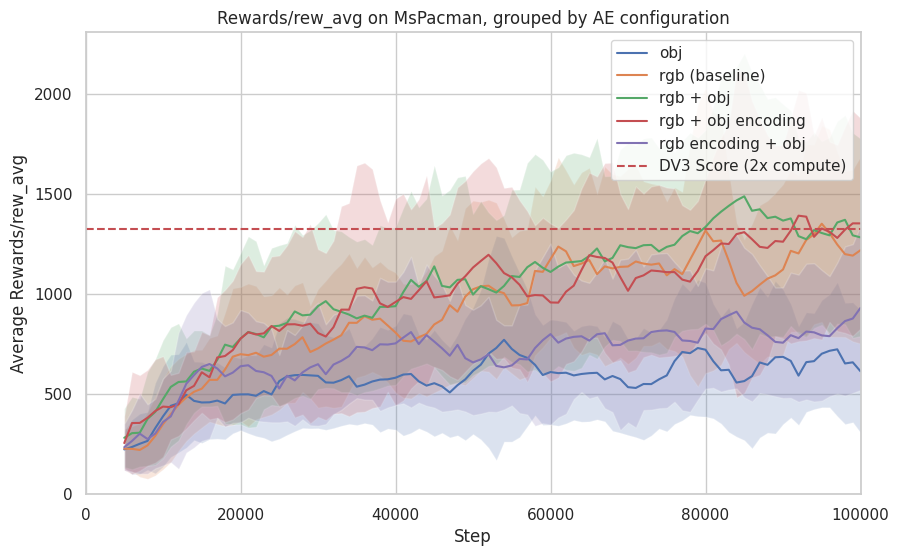

Plotting for metric: Game/ep_len_avg
AE_Keys
obj                    8
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
rgb encoding + obj     8
Name: Run_ID, dtype: int64
Plotting for metric: Time/sps_env_interaction
AE_Keys
obj                    8
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
rgb encoding + obj     8
Name: Run_ID, dtype: int64
Plotting for metric: Loss/world_model_loss
AE_Keys
obj                    8
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
rgb encoding + obj     8
Name: Run_ID, dtype: int64
Plotting for metric: Loss/value_loss
AE_Keys
obj                    8
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
rgb encoding + obj     8
Name: Run_ID, dtype: int64
Plotting for metric: Loss/policy_loss
AE_Keys
obj                    8
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
rgb encoding + obj     8
Name: Run_ID, dtype: int64

/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

<Figure size 1000x600 with 0 Axes>

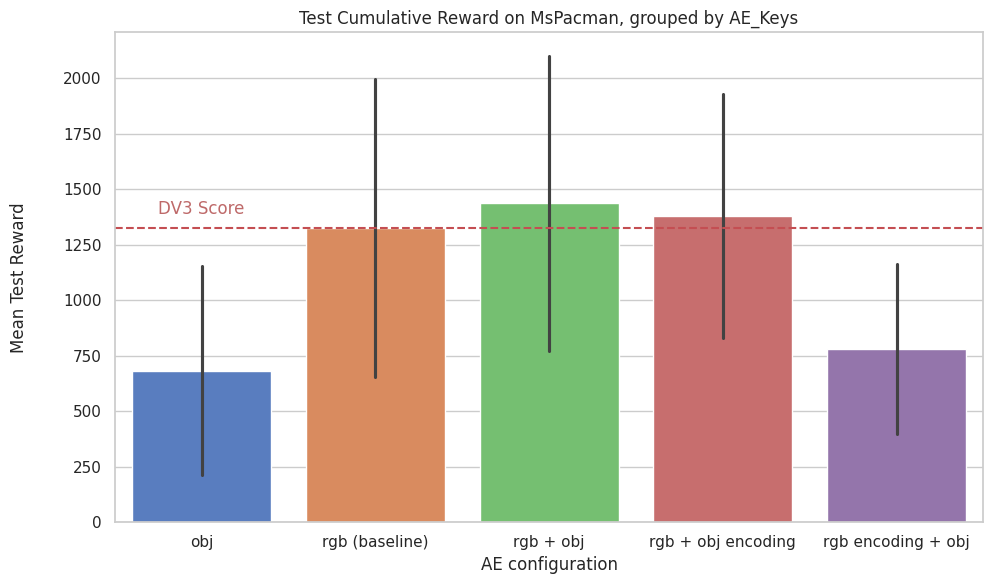

Plotting for metric: Loss/observation_loss_rgb
AE_Keys
rgb (baseline)         8
rgb + obj             11
rgb + obj encoding     8
Name: Run_ID, dtype: int64
Plotting for metric: Train/cumulative_reward
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64


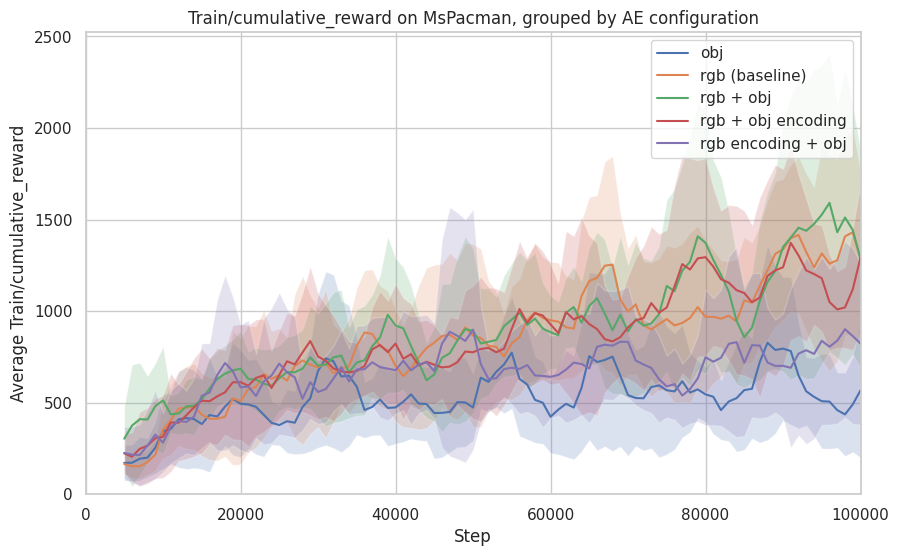

Processing Assault...
Total number of experiments processed: 48
Unique train_every: [2 8]
Plotting for train_every: 2
Plotting for metric: Rewards/rew_avg
AE_Keys
obj                   4
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    5
rgb encoding + obj    5
Name: Run_ID, dtype: int64


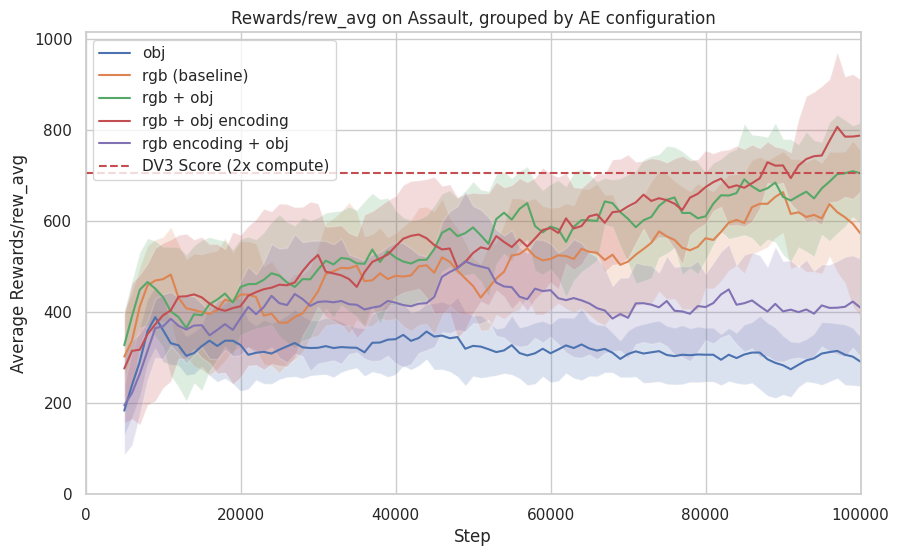

Plotting for metric: Game/ep_len_avg
AE_Keys
obj                   4
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    5
rgb encoding + obj    5
Name: Run_ID, dtype: int64
Plotting for metric: Time/sps_env_interaction
AE_Keys
obj                   4
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    5
rgb encoding + obj    5
Name: Run_ID, dtype: int64
Plotting for metric: Loss/world_model_loss
AE_Keys
obj                   4
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    5
rgb encoding + obj    5
Name: Run_ID, dtype: int64
Plotting for metric: Loss/value_loss
AE_Keys
obj                   4
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    5
rgb encoding + obj    5
Name: Run_ID, dtype: int64
Plotting for metric: Loss/policy_loss
AE_Keys
obj                   4
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    5
rgb encoding + obj    5
Name: Run_ID, dtype: int64
Plotting for metric: Los

/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

<Figure size 1000x600 with 0 Axes>

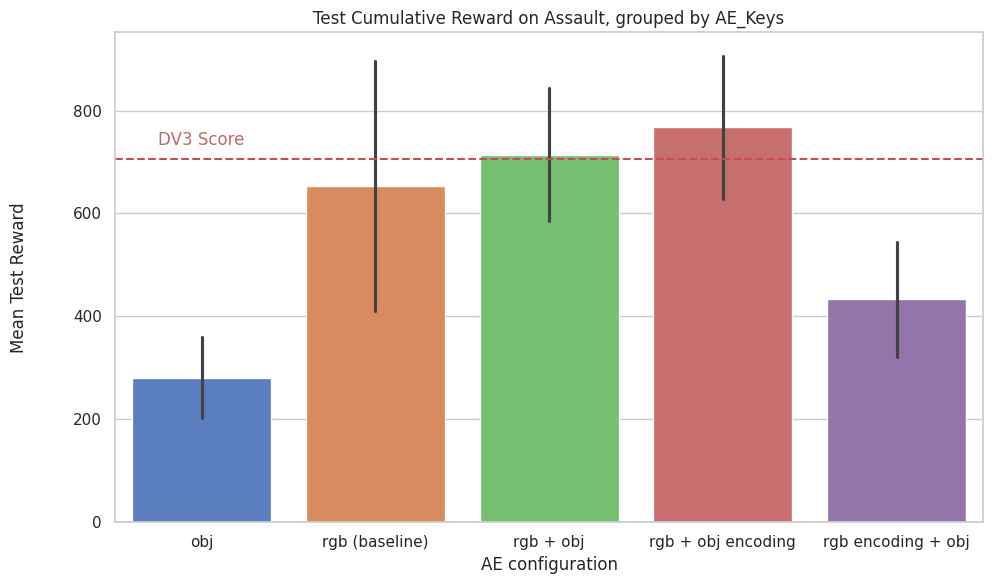

Processing Carnival...
Total number of experiments processed: 29
Unique train_every: [8 2]
Plotting for train_every: 2
Plotting for metric: Rewards/rew_avg
AE_Keys
obj                   2
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    3
rgb encoding + obj    2
Name: Run_ID, dtype: int64


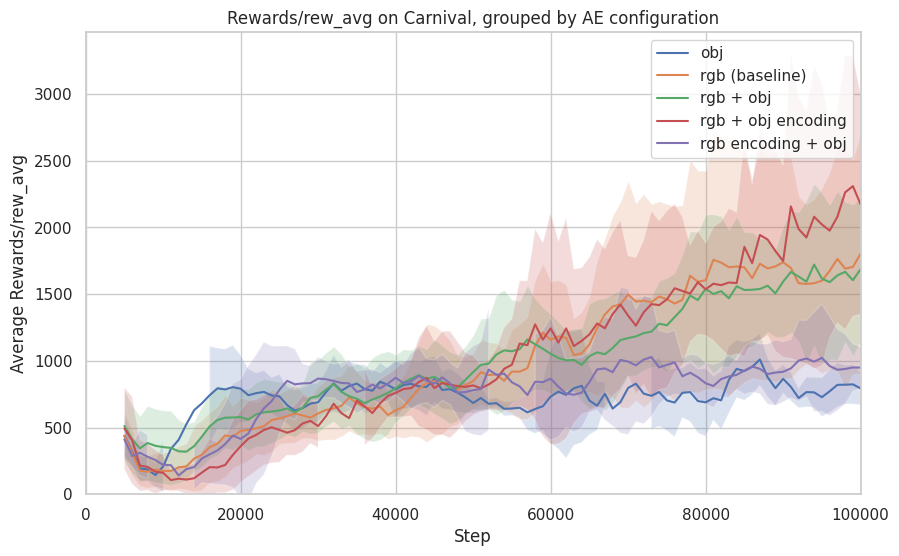

Plotting for metric: Game/ep_len_avg
AE_Keys
obj                   2
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    3
rgb encoding + obj    2
Name: Run_ID, dtype: int64
Plotting for metric: Time/sps_env_interaction
AE_Keys
obj                   2
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    3
rgb encoding + obj    2
Name: Run_ID, dtype: int64
Plotting for metric: Loss/world_model_loss
AE_Keys
obj                   2
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    3
rgb encoding + obj    2
Name: Run_ID, dtype: int64
Plotting for metric: Loss/value_loss
AE_Keys
obj                   2
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    3
rgb encoding + obj    2
Name: Run_ID, dtype: int64
Plotting for metric: Loss/policy_loss
AE_Keys
obj                   2
rgb (baseline)        5
rgb + obj             5
rgb + obj encoding    3
rgb encoding + obj    2
Name: Run_ID, dtype: int64
Plotting for metric: Los

/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

<Figure size 1000x600 with 0 Axes>

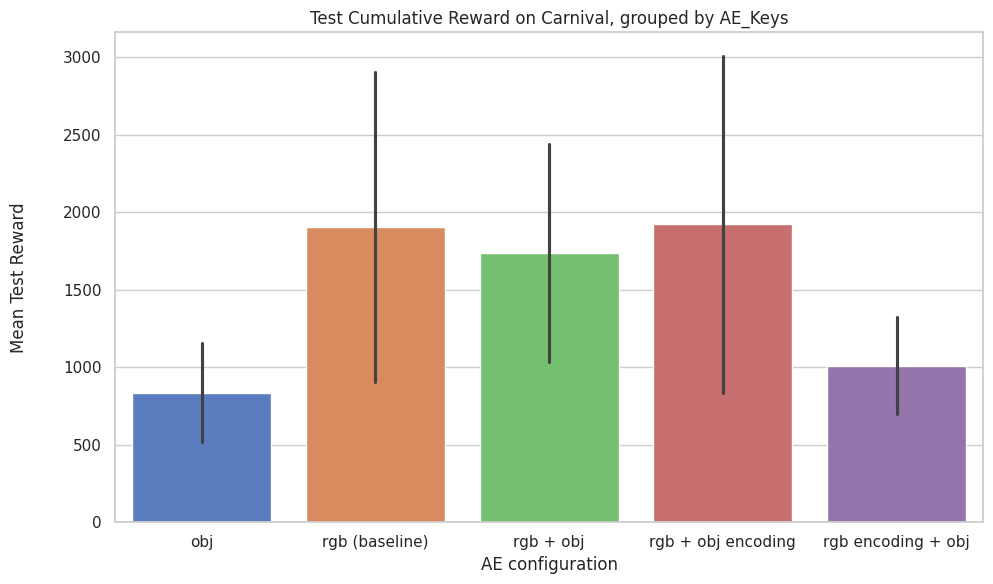

Processing Breakout...
Total number of experiments processed: 41
Unique train_every: [2 8]
Plotting for train_every: 2
Plotting for metric: Rewards/rew_avg
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64


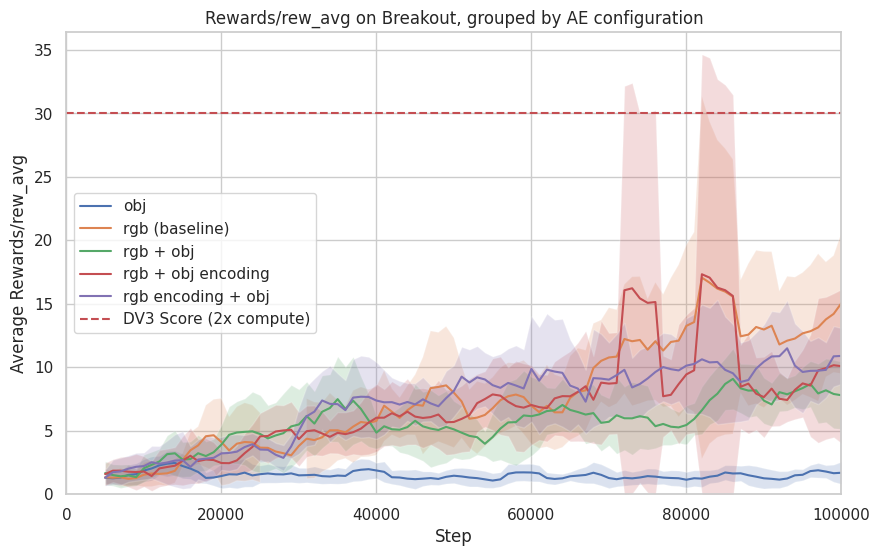

Plotting for metric: Game/ep_len_avg
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64
Plotting for metric: Time/sps_env_interaction
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64
Plotting for metric: Loss/world_model_loss
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64
Plotting for metric: Loss/value_loss
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64
Plotting for metric: Loss/policy_loss
AE_Keys
obj                   3
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
rgb encoding + obj    3
Name: Run_ID, dtype: int64
Plotting for metric: Los

/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

<Figure size 1000x600 with 0 Axes>

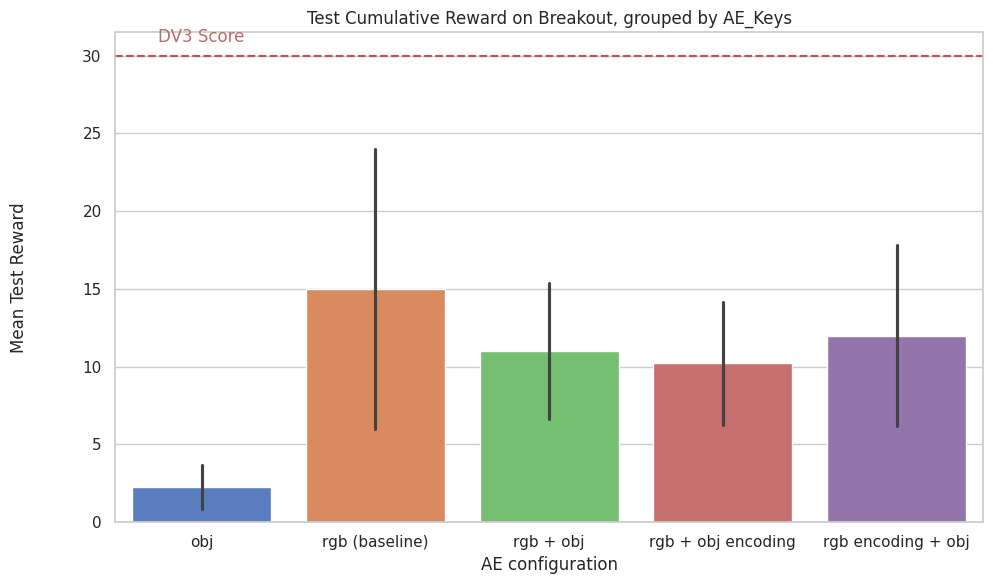

Plotting for metric: Loss/observation_loss_rgb
AE_Keys
rgb (baseline)        3
rgb + obj             3
rgb + obj encoding    3
Name: Run_ID, dtype: int64


In [20]:
games = ['MsPacman', 'Assault', 'Carnival', 'Breakout']
#games = ['Assault']

for game in games:
    print(f"Processing {game}...")
    game_path = f'logs/runs/dreamer_v3/{game}NoFrameskip-v4'
    update_viz(game_path)

# Perturbations

Total number of experiments processed: 48
Plotting for metric: Rewards/rew_avg
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


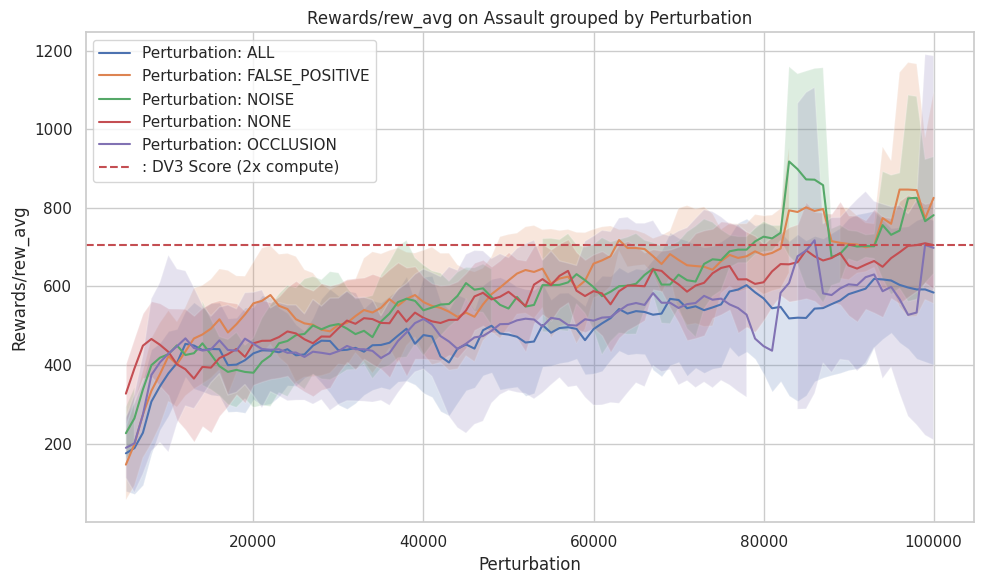

Plotting for metric: Game/ep_len_avg
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


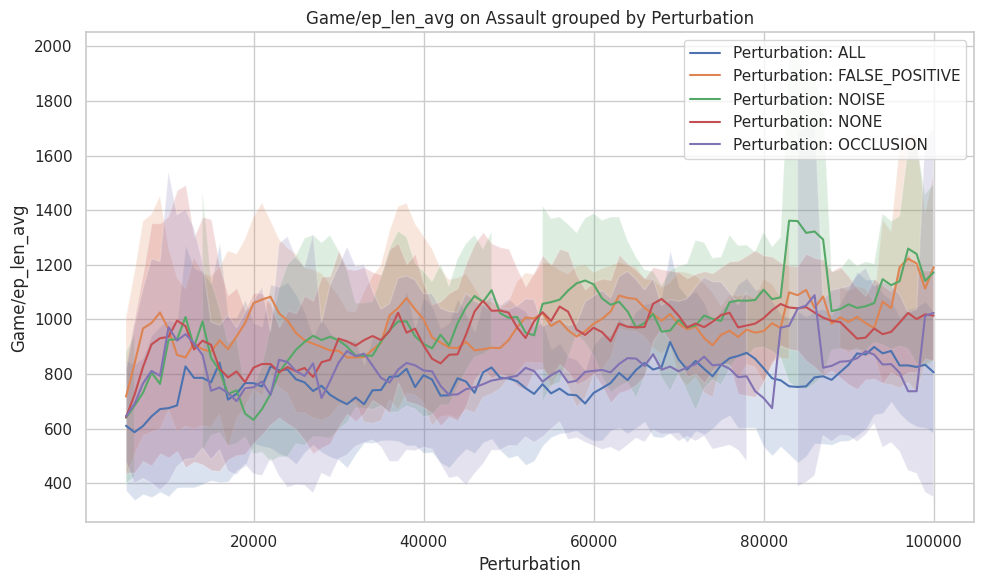

Plotting for metric: Time/sps_env_interaction
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


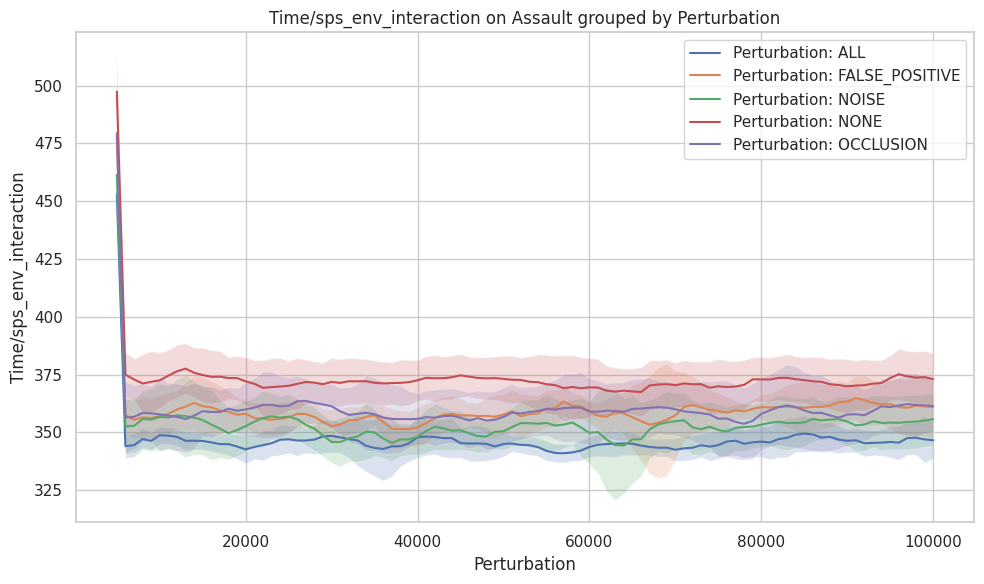

Plotting for metric: Loss/world_model_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


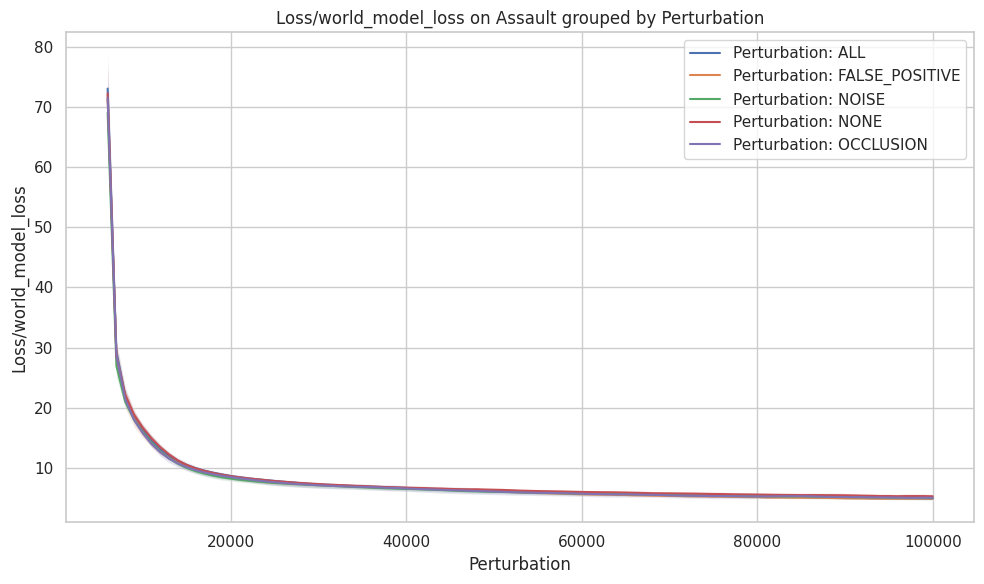

Plotting for metric: Loss/value_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


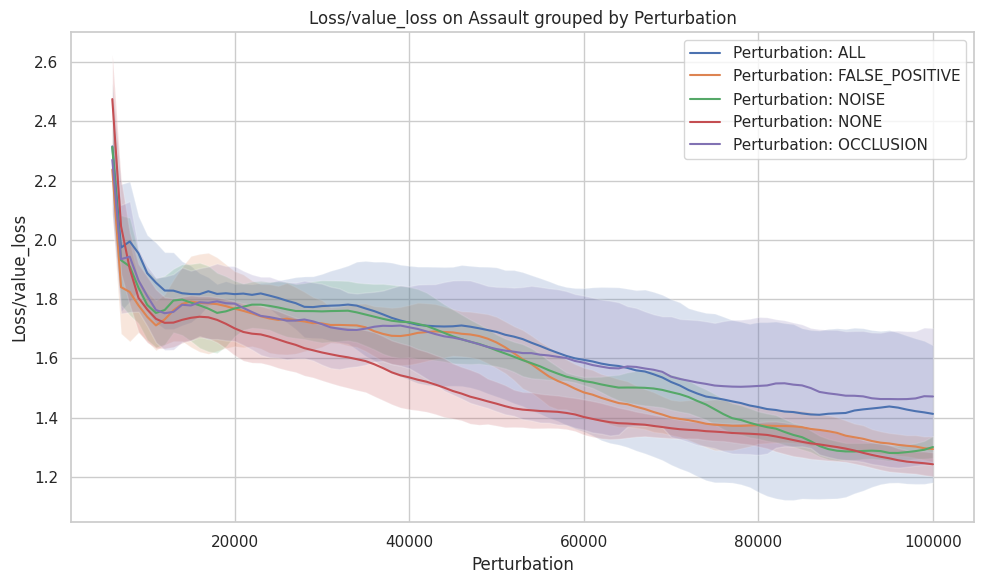

Plotting for metric: Loss/policy_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


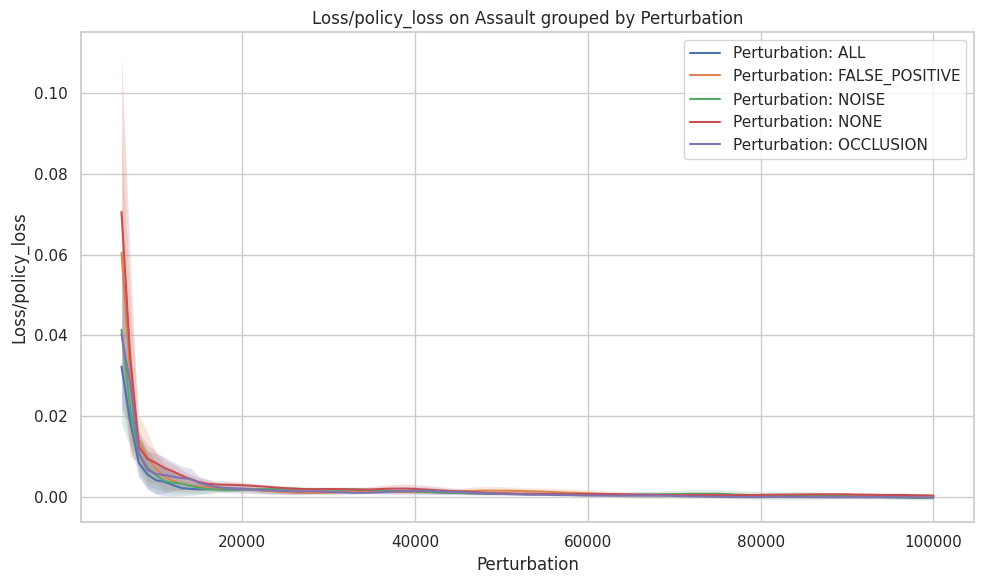

Plotting for metric: Loss/observation_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


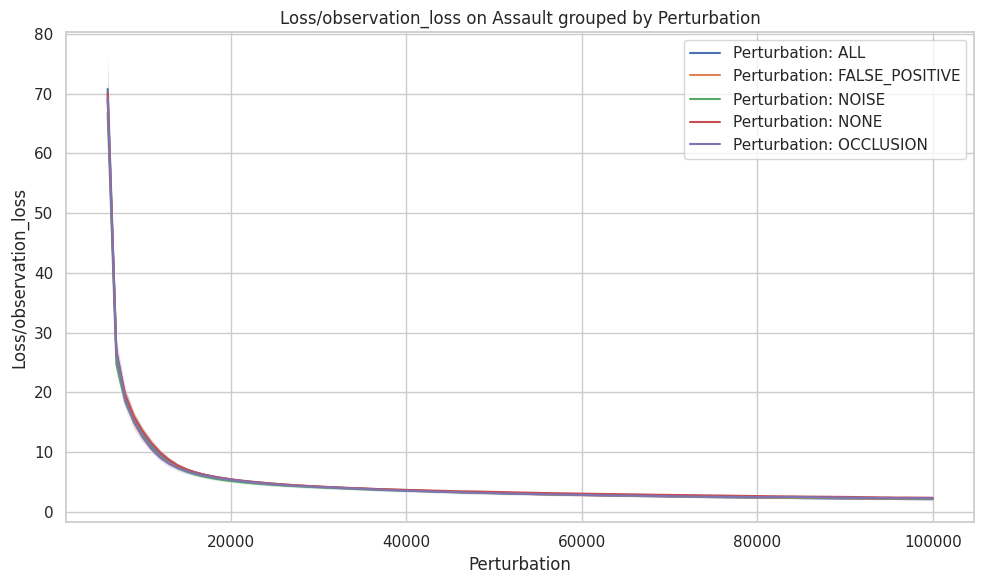

Plotting for metric: Loss/reward_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


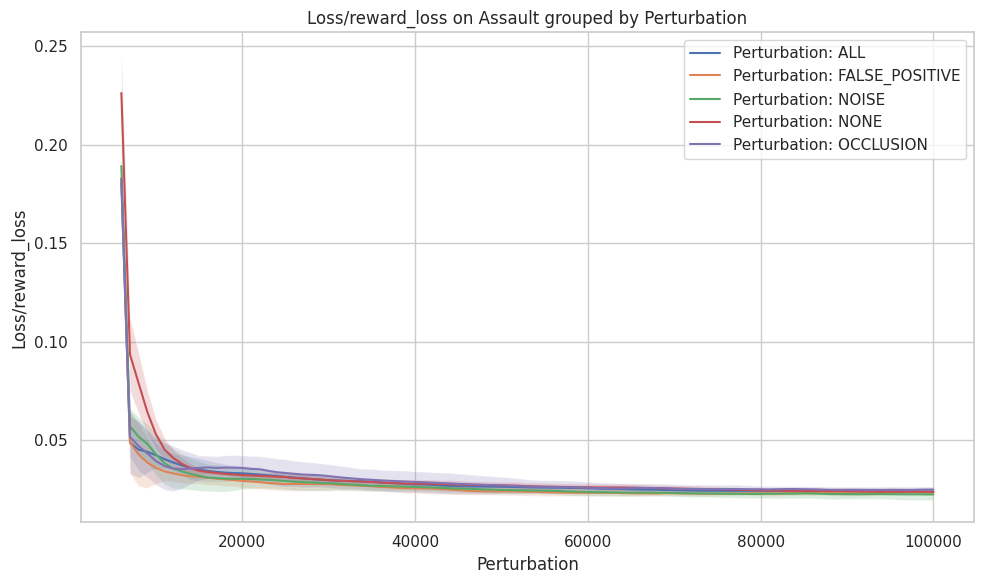

Plotting for metric: Loss/state_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


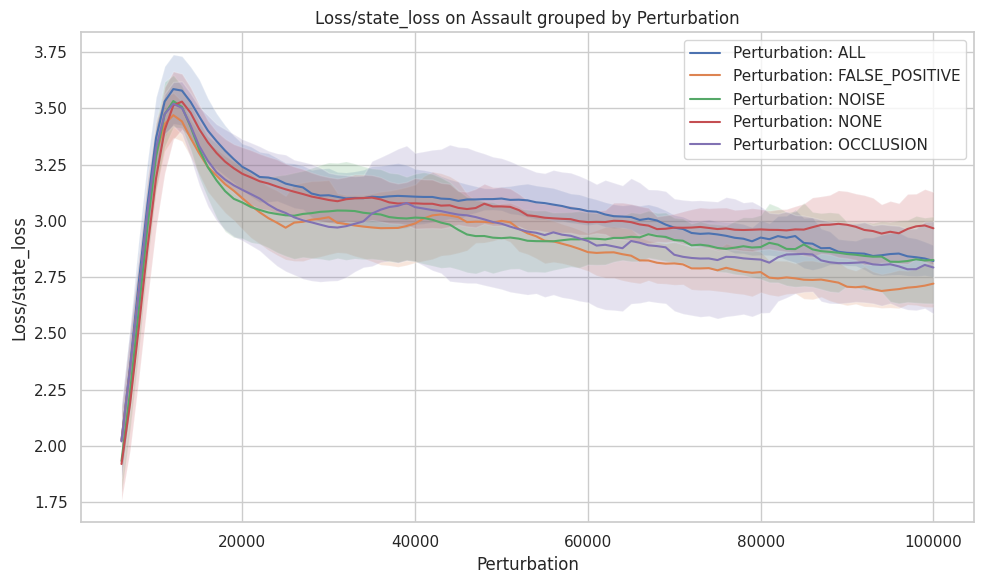

Plotting for metric: Loss/continue_loss
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


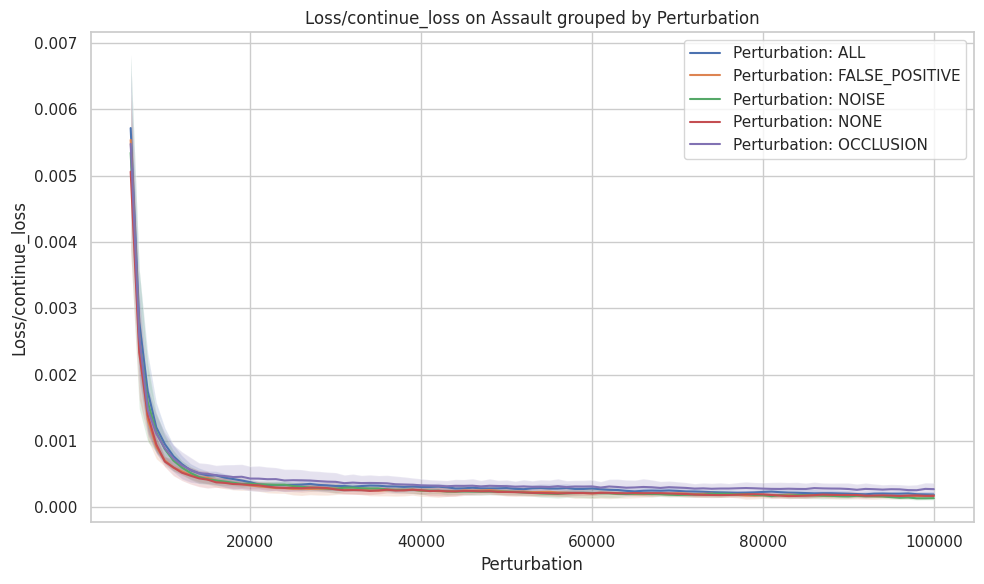

Plotting for metric: State/kl
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


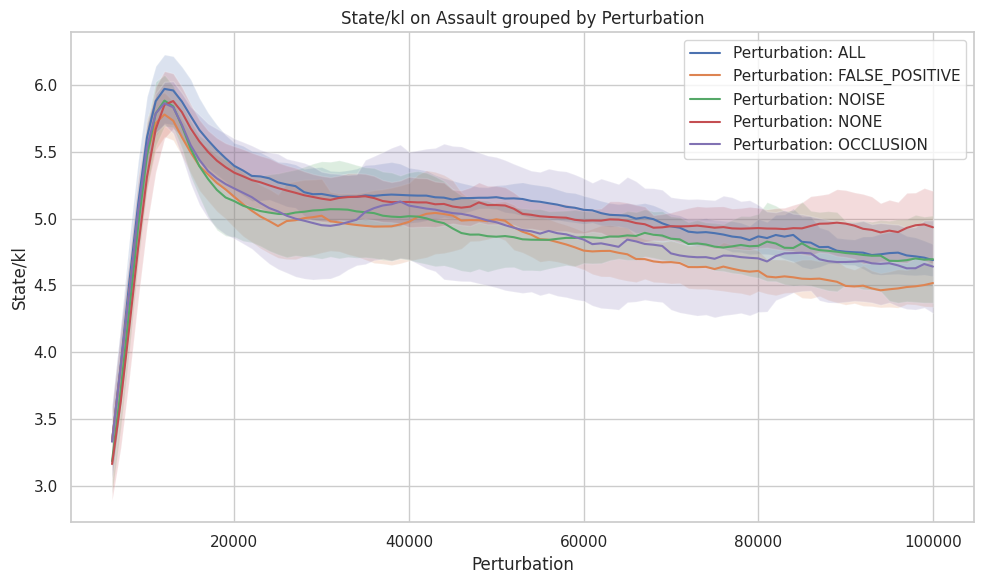

Plotting for metric: State/post_entropy
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


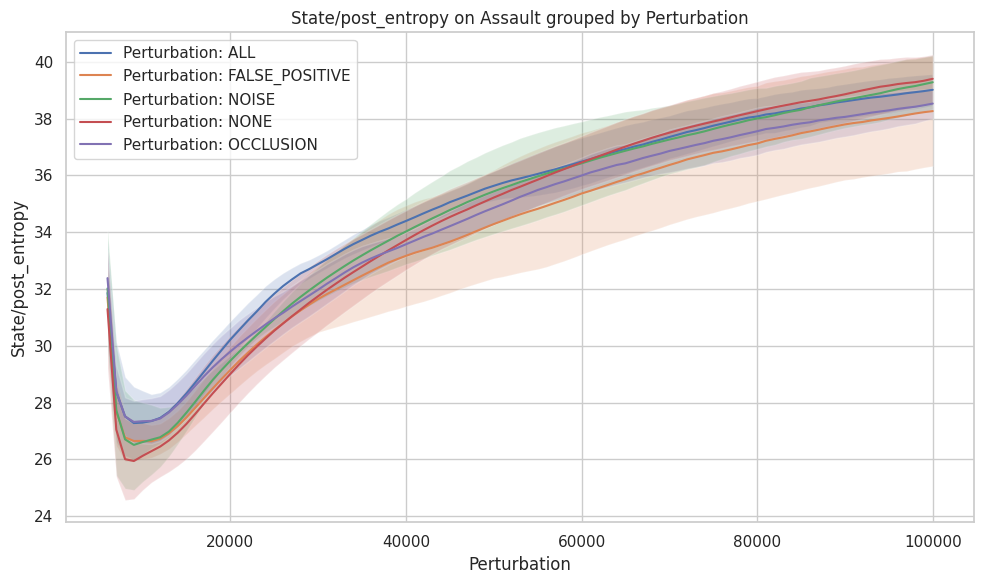

Plotting for metric: State/prior_entropy
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


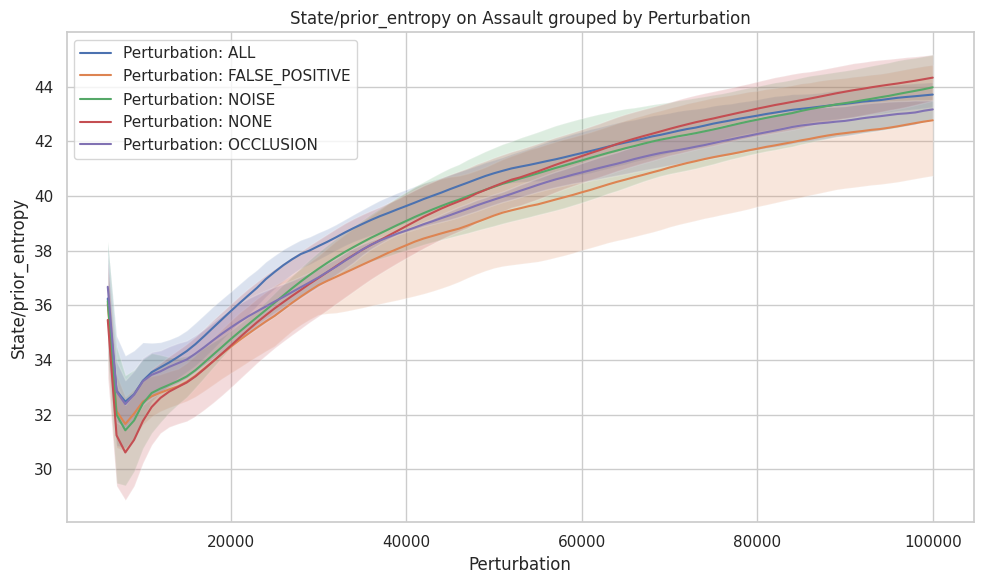

Plotting for metric: Grads/world_model
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


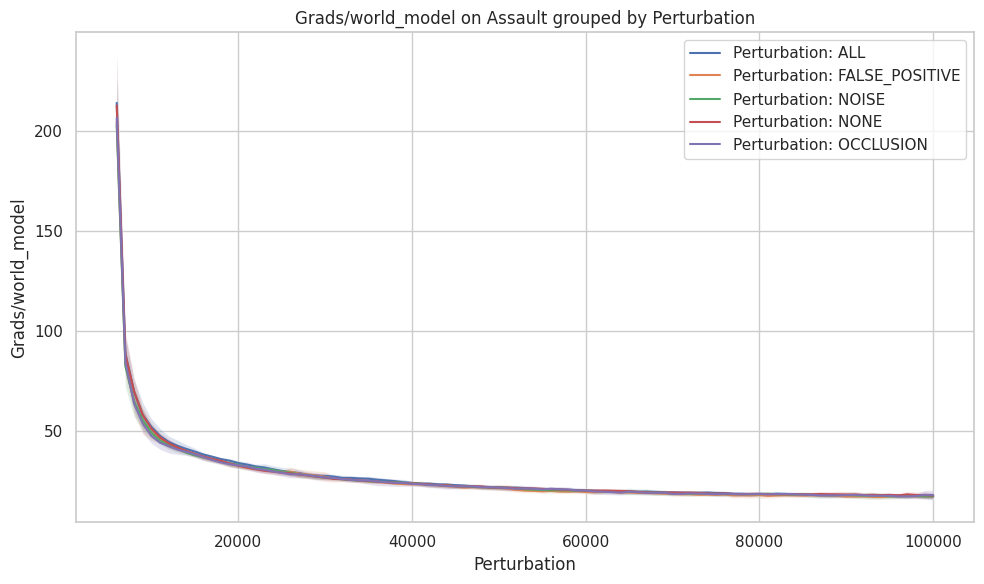

Plotting for metric: Grads/actor
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


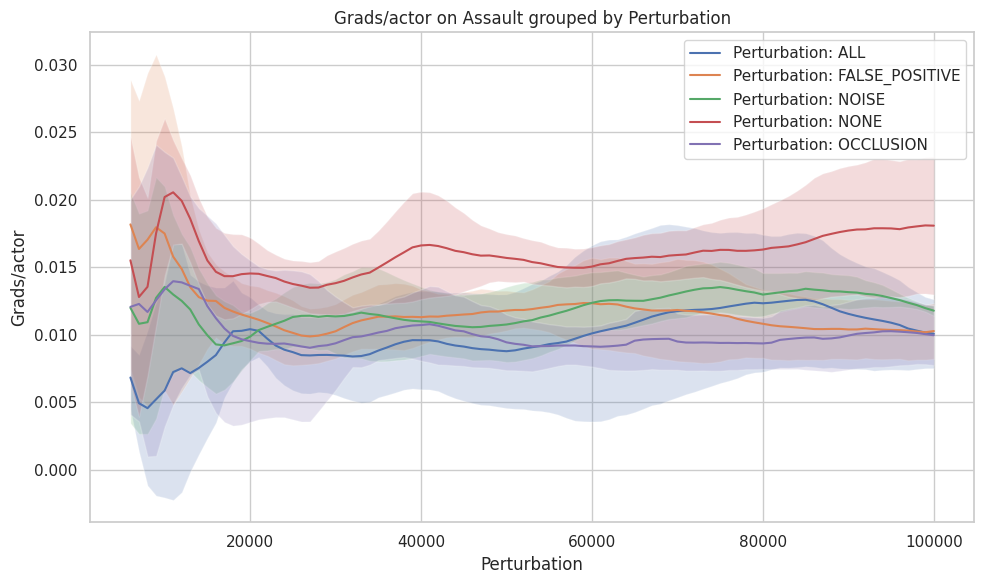

Plotting for metric: Grads/critic
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


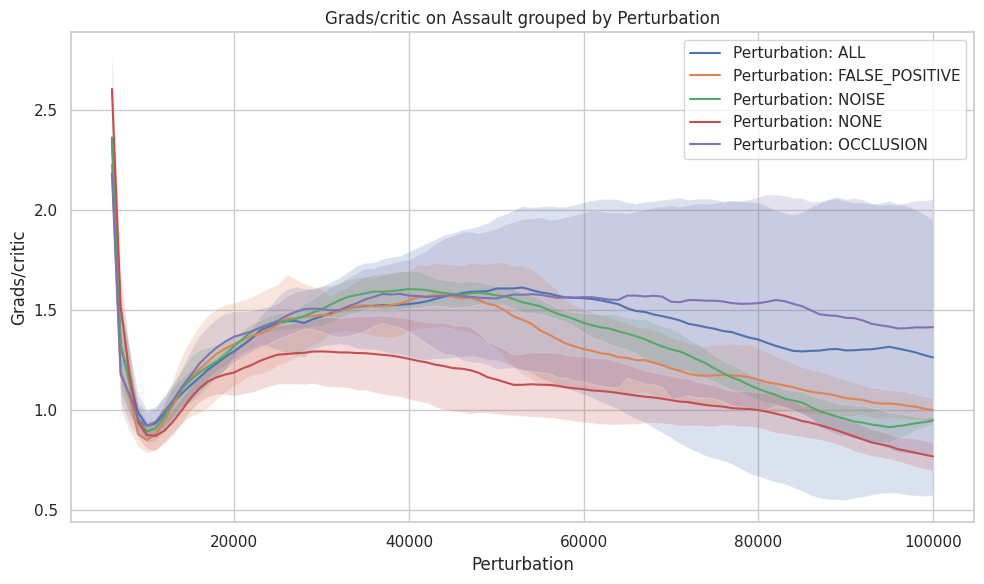

Plotting for metric: Loss/observation_loss_rgb
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


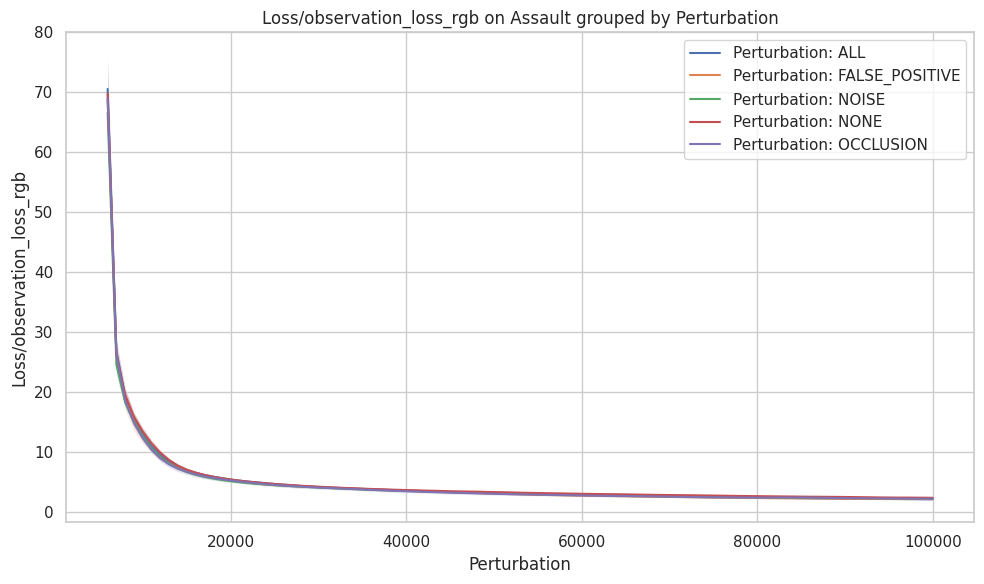

Plotting for metric: Loss/observation_loss_objects_position
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


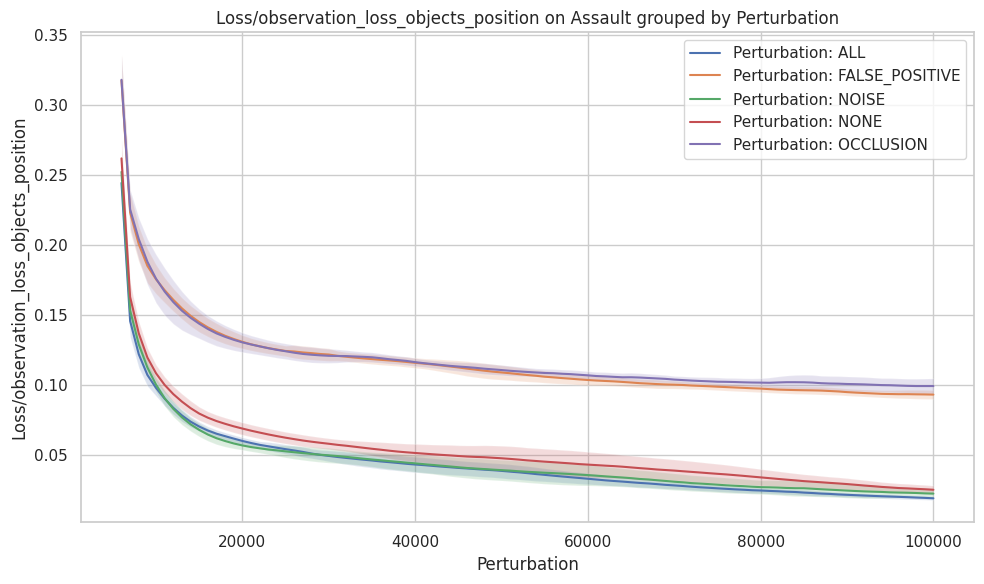

Plotting for metric: Time/sps_train
Perturbation
ALL               3
FALSE_POSITIVE    3
NOISE             3
NONE              5
OCCLUSION         3
Name: Run_ID, dtype: int64


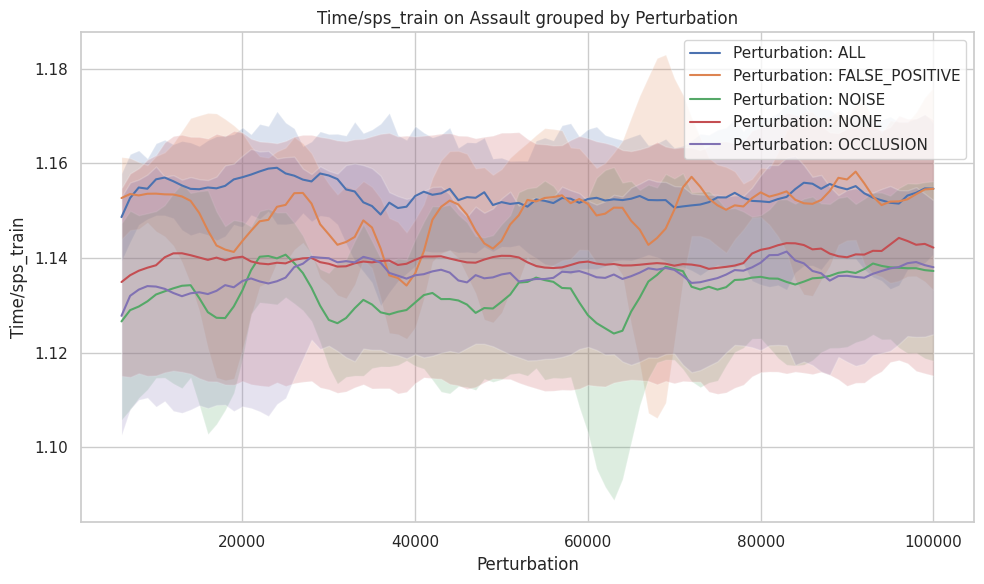

Plotting for metric: Test/cumulative_reward
Perturbation
ALL                60
FALSE_POSITIVE     60
NOISE              59
NONE              100
OCCLUSION          60
Name: Value, dtype: int64


/tmp/ipykernel_4091329/482502851.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter_name, y="Value", data=metric_df.sort_values(parameter_name), errorbar="sd", palette="muted")
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

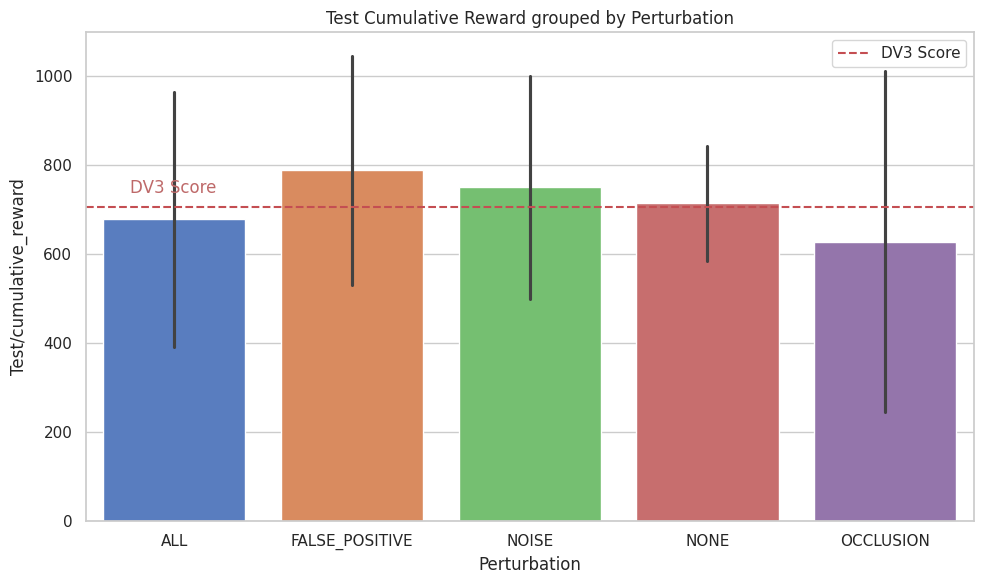

In [30]:
analyze_and_plot_by_parameter('Assault', 'Perturbation')

# Object loss scaling

Total number of experiments processed: 73
Plotting for metric: Rewards/rew_avg


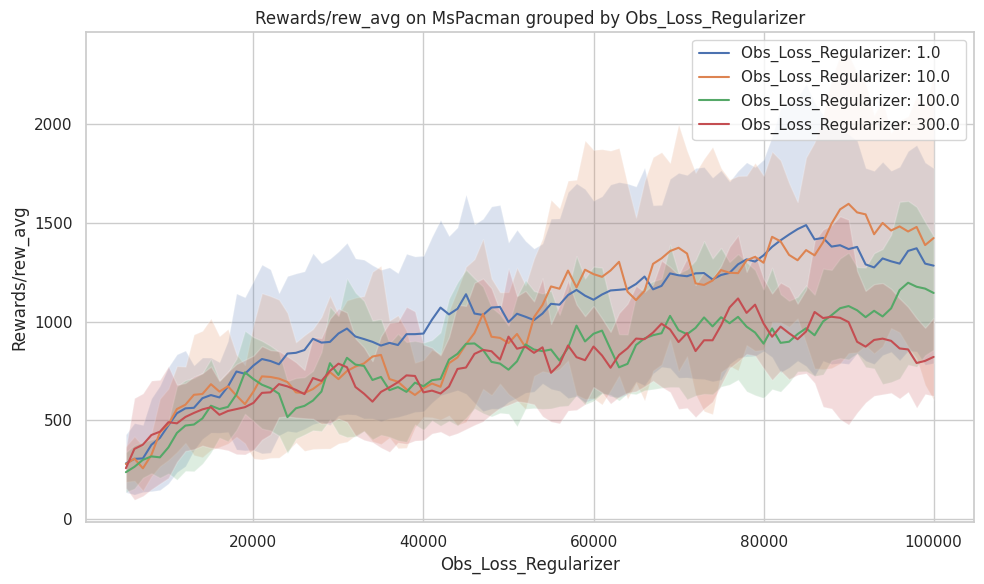

Plotting for metric: Game/ep_len_avg


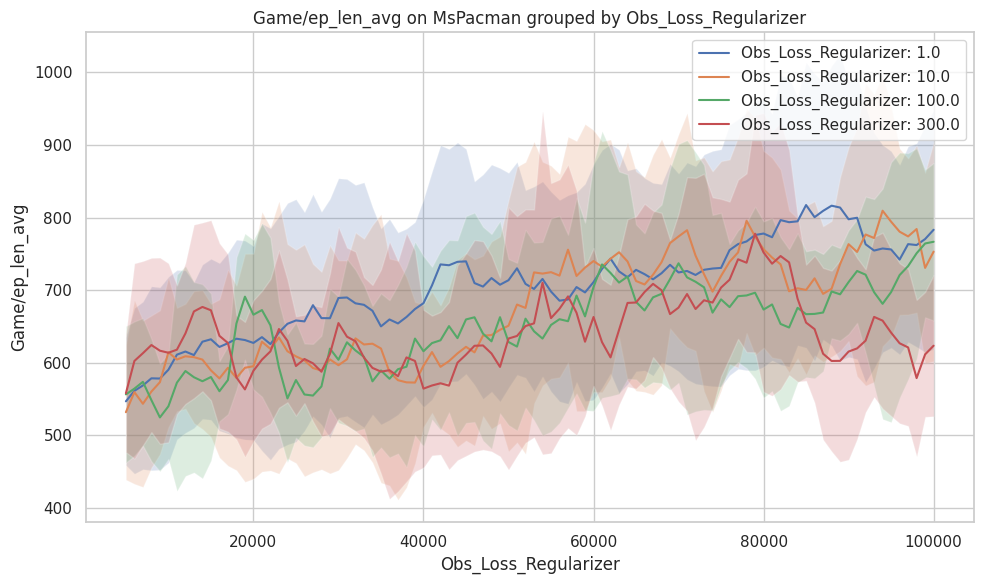

Plotting for metric: Time/sps_env_interaction


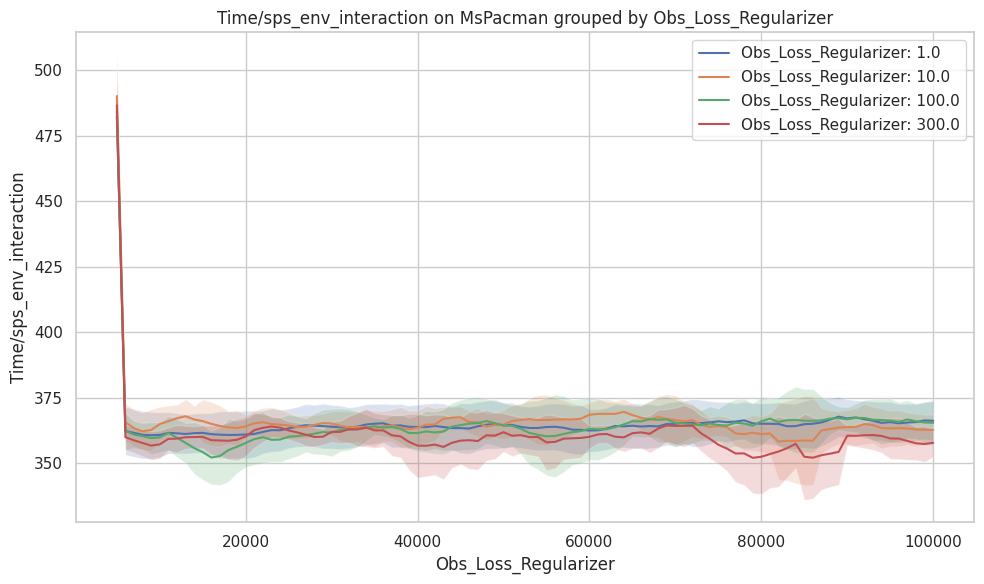

Plotting for metric: Loss/world_model_loss


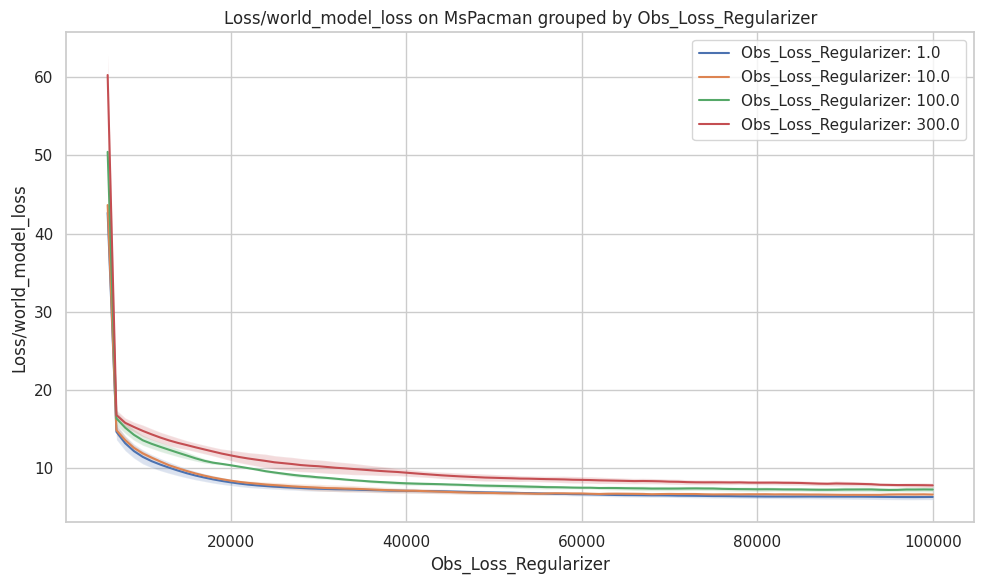

Plotting for metric: Loss/value_loss


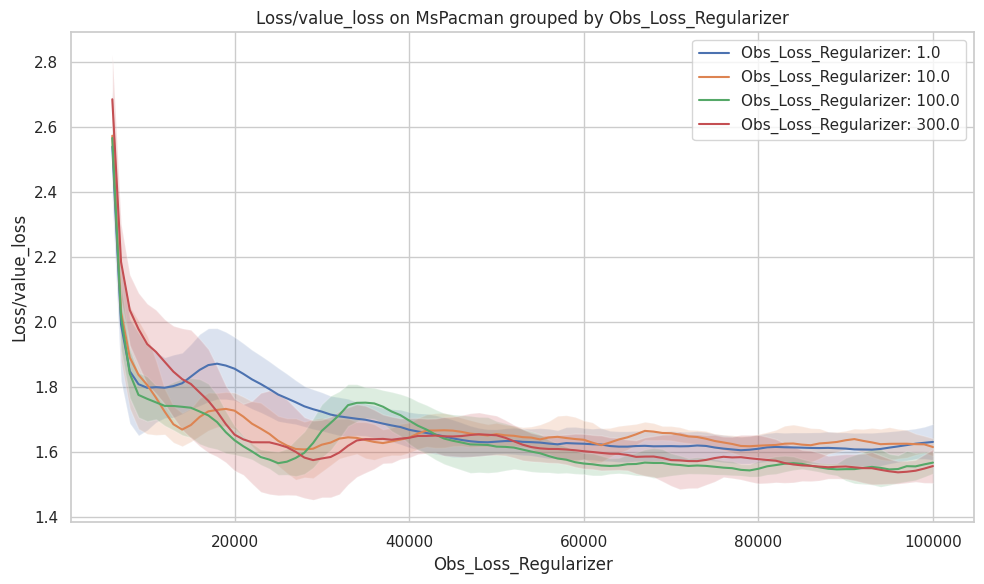

Plotting for metric: Loss/policy_loss


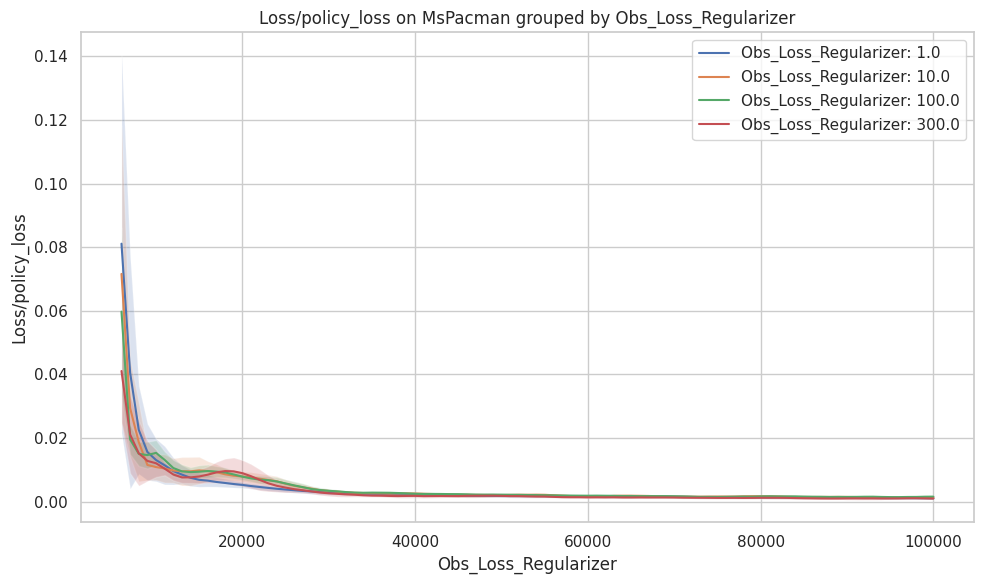

Plotting for metric: Loss/observation_loss


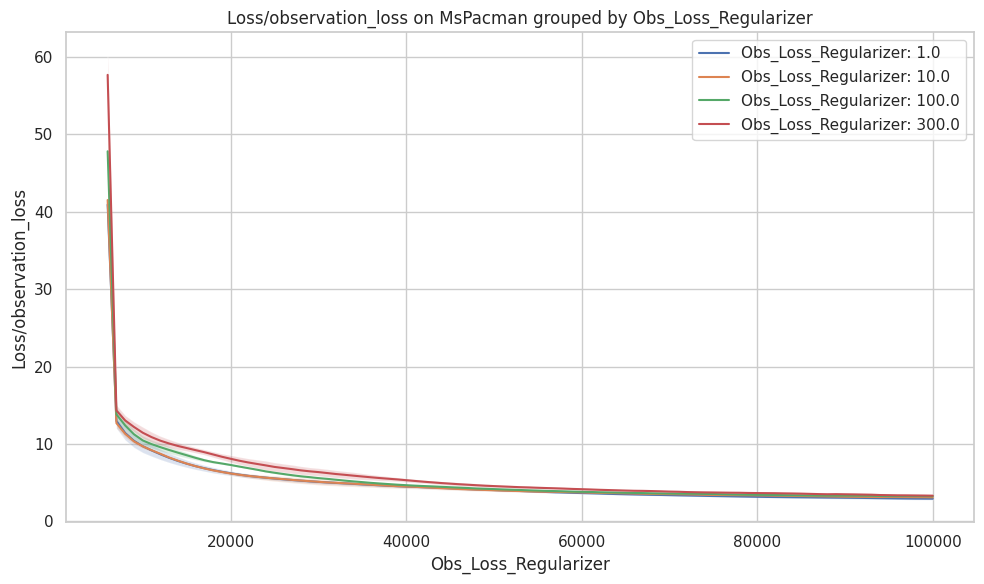

Plotting for metric: Loss/reward_loss


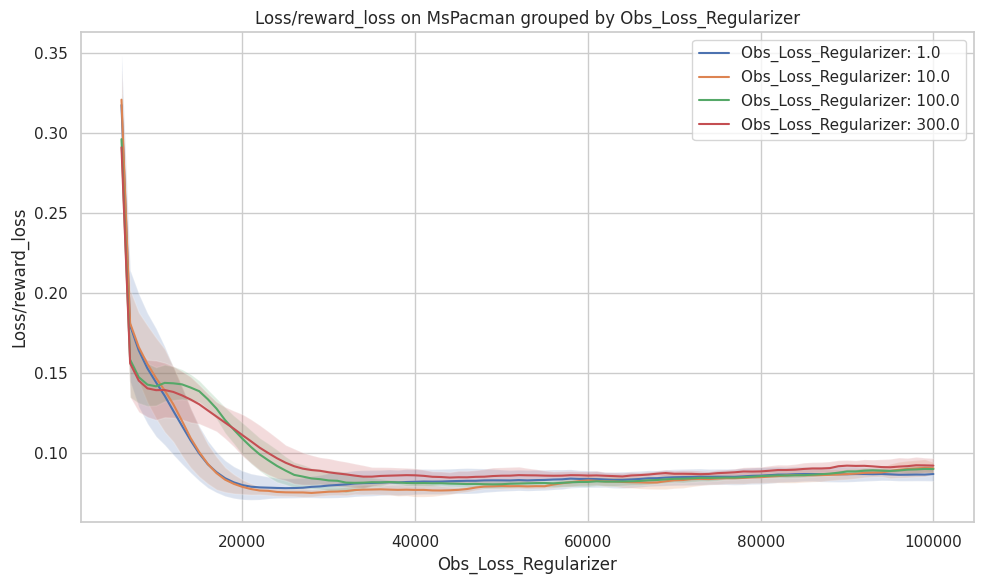

Plotting for metric: Loss/state_loss


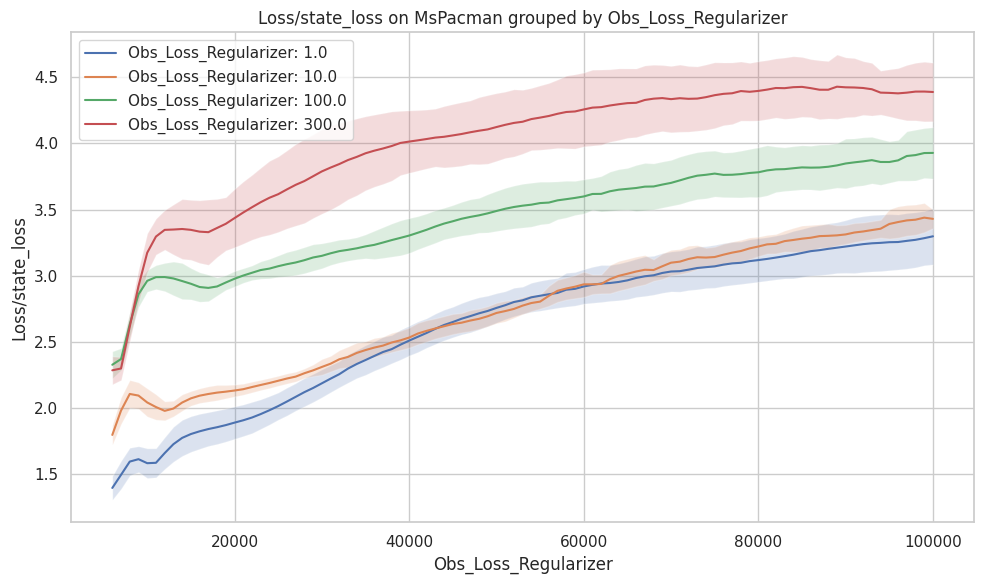

Plotting for metric: Loss/continue_loss


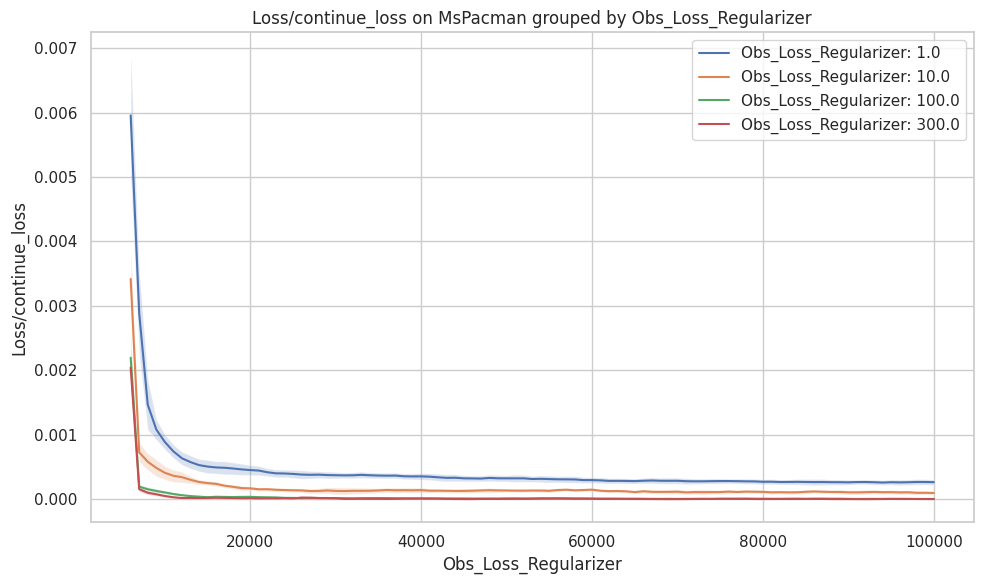

Plotting for metric: State/kl


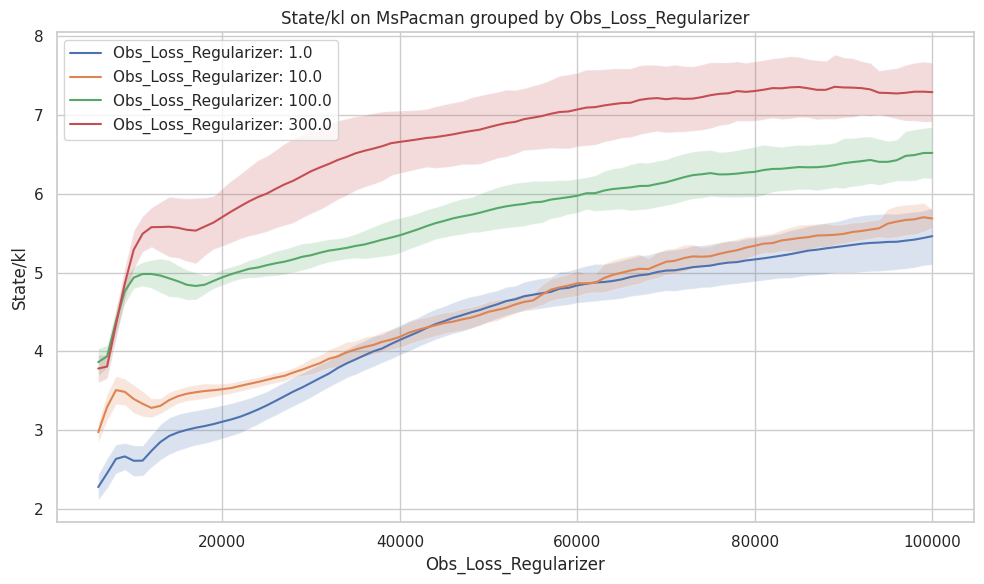

Plotting for metric: State/post_entropy


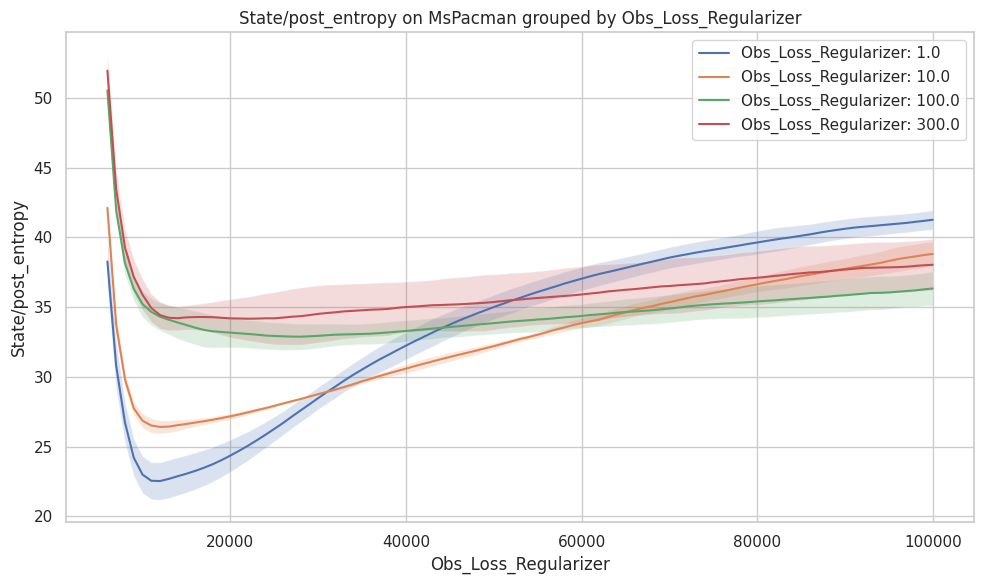

Plotting for metric: State/prior_entropy


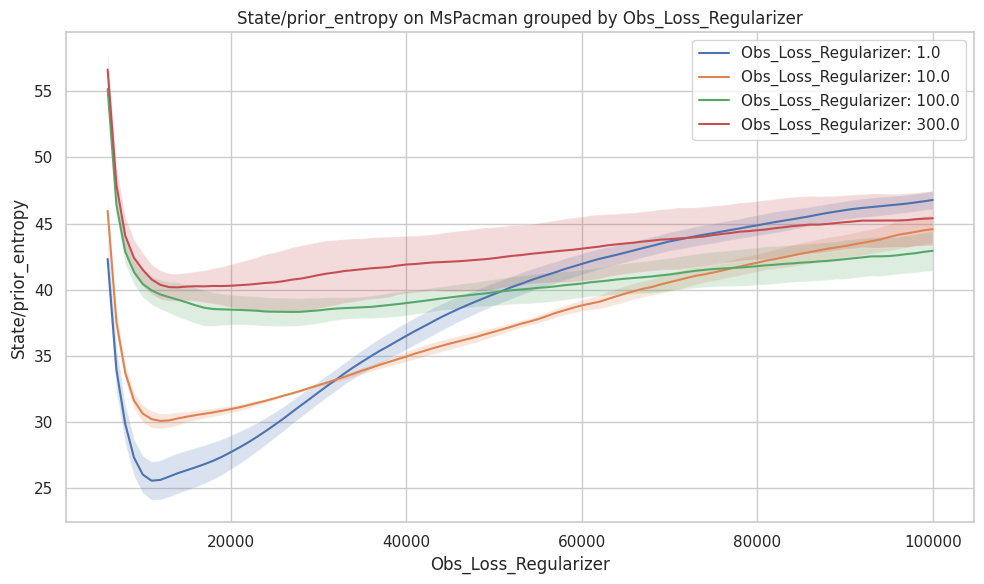

Plotting for metric: Grads/world_model


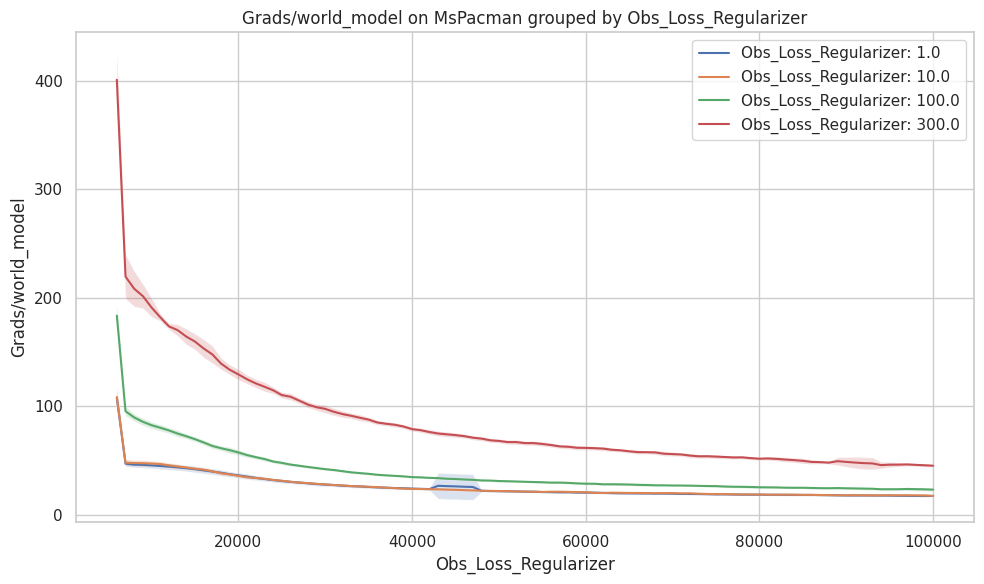

Plotting for metric: Grads/actor


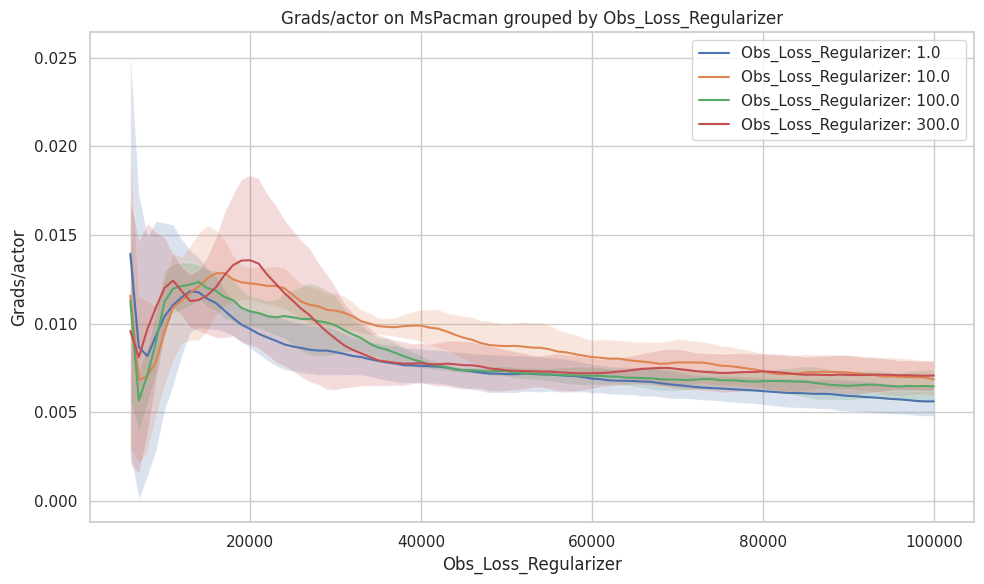

Plotting for metric: Grads/critic


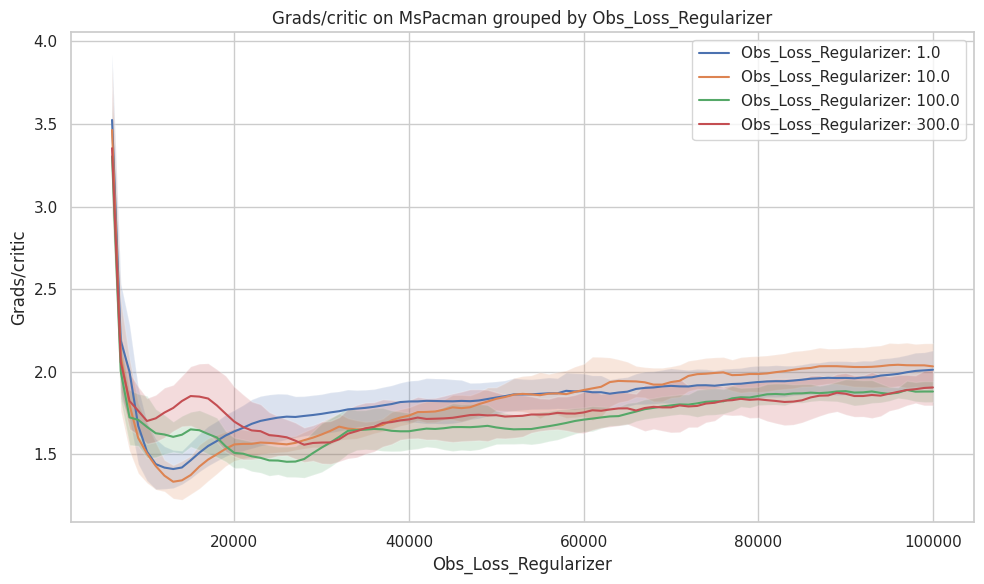

Plotting for metric: Loss/observation_loss_rgb


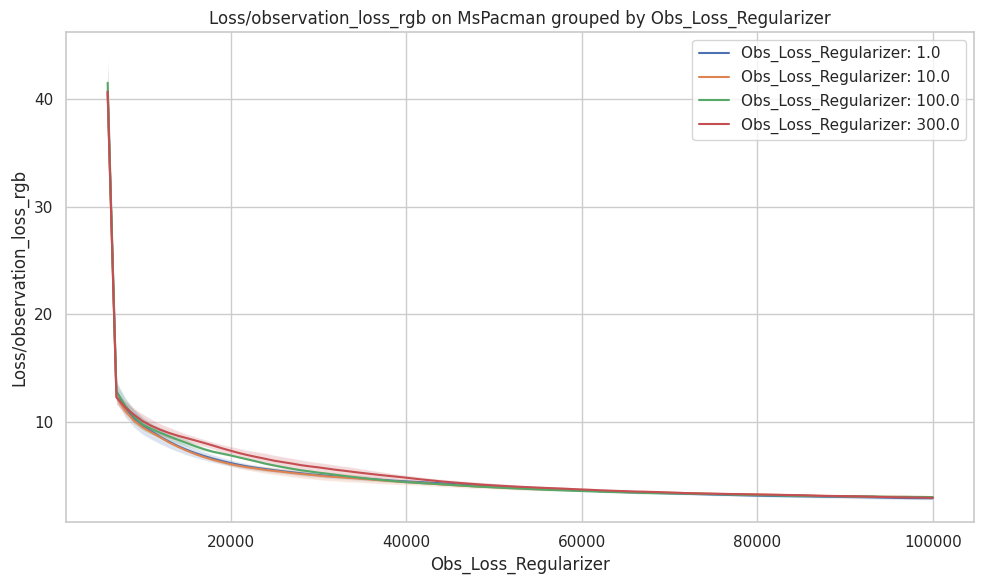

Plotting for metric: Loss/observation_loss_objects_position


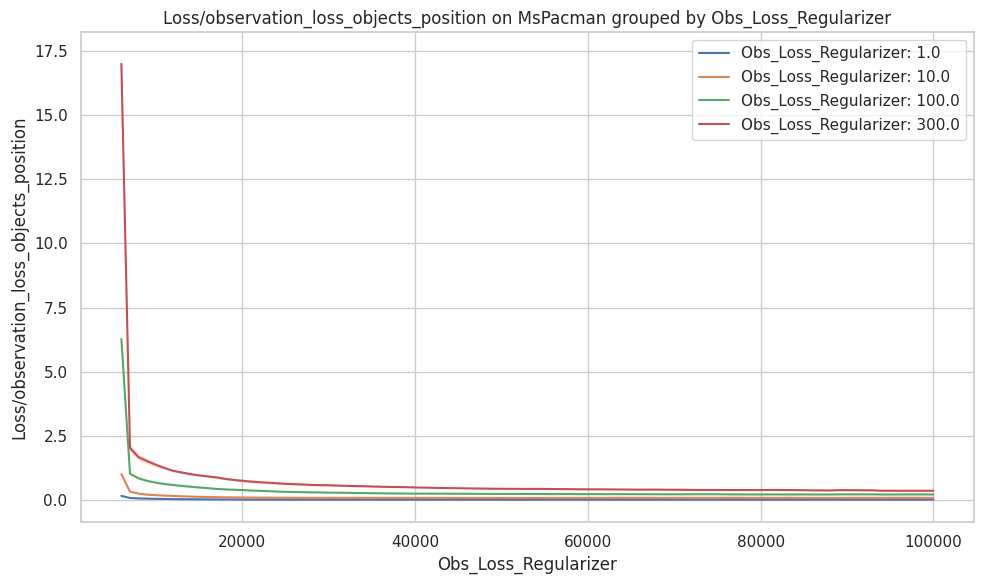

Plotting for metric: Time/sps_train


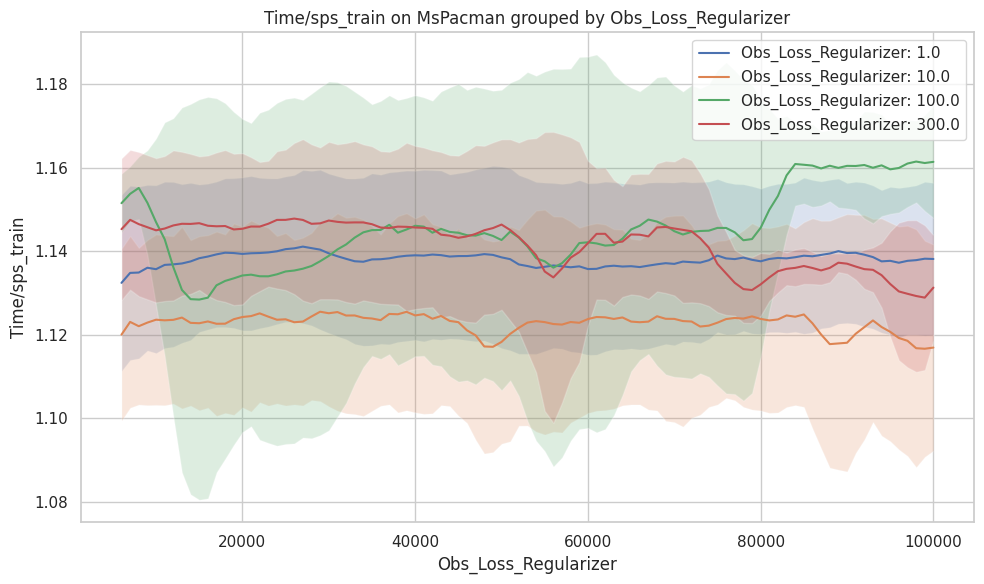

/tmp/ipykernel_4091329/3024990332.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter_name, y="Value", data=metric_df.sort_values(parameter_name), errorbar="sd", palette="muted")
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

Plotting for metric: Test/cumulative_reward
Obs_Loss_Regularizer
1.0      11
10.0      3
100.0     3
300.0     3
Name: Run_ID, dtype: int64


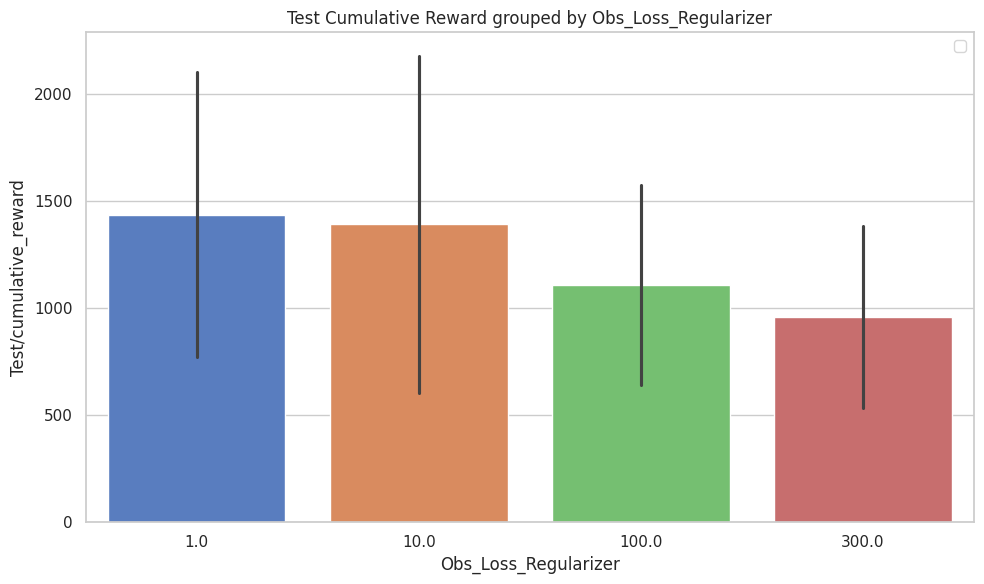

Plotting for metric: Train/cumulative_reward


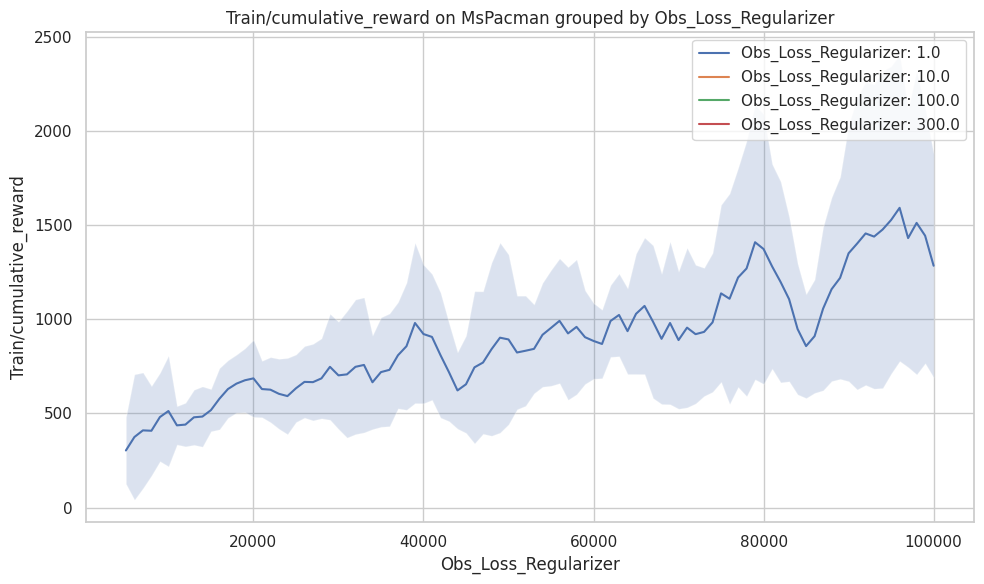

In [22]:
analyze_and_plot_by_parameter('MsPacman', 'Obs_Loss_Regularizer')

# Buffer 10K

Total number of experiments processed: 73
Plotting for metric: Rewards/rew_avg


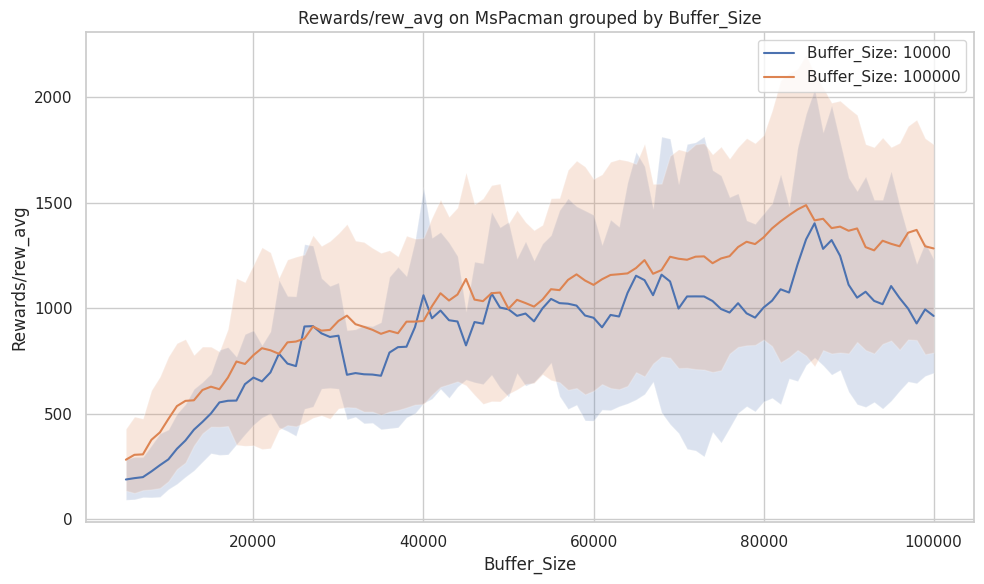

Plotting for metric: Game/ep_len_avg


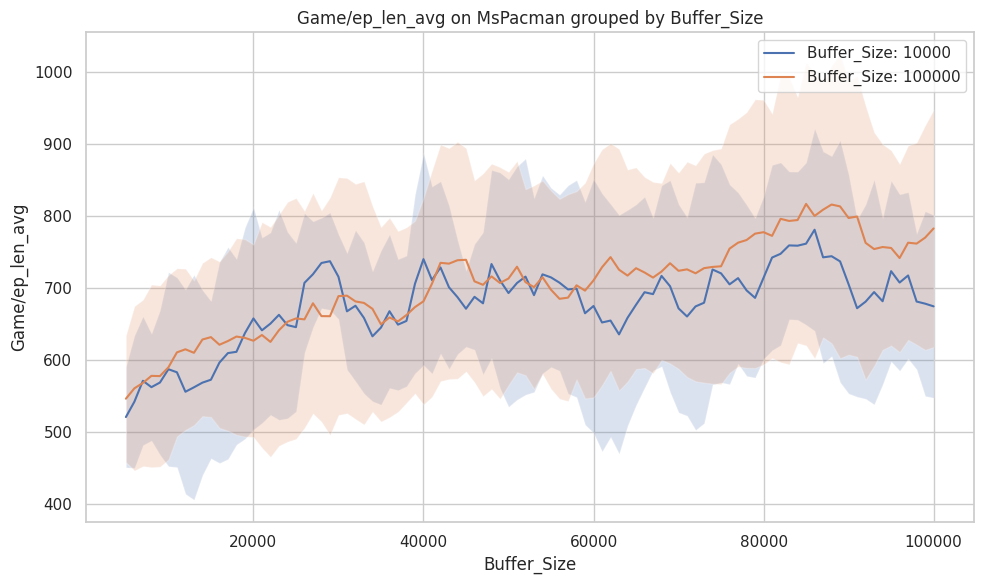

Plotting for metric: Time/sps_env_interaction


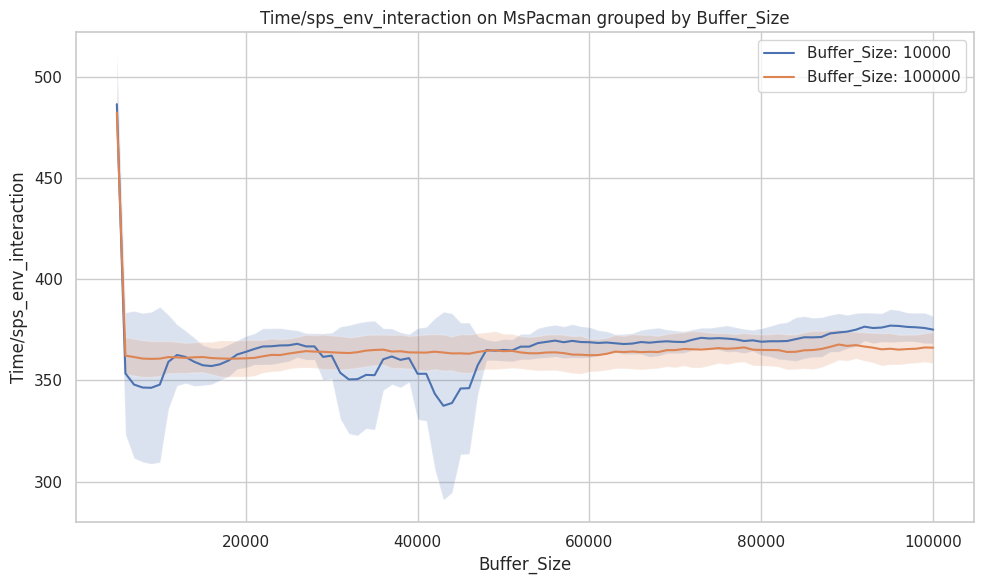

Plotting for metric: Loss/world_model_loss


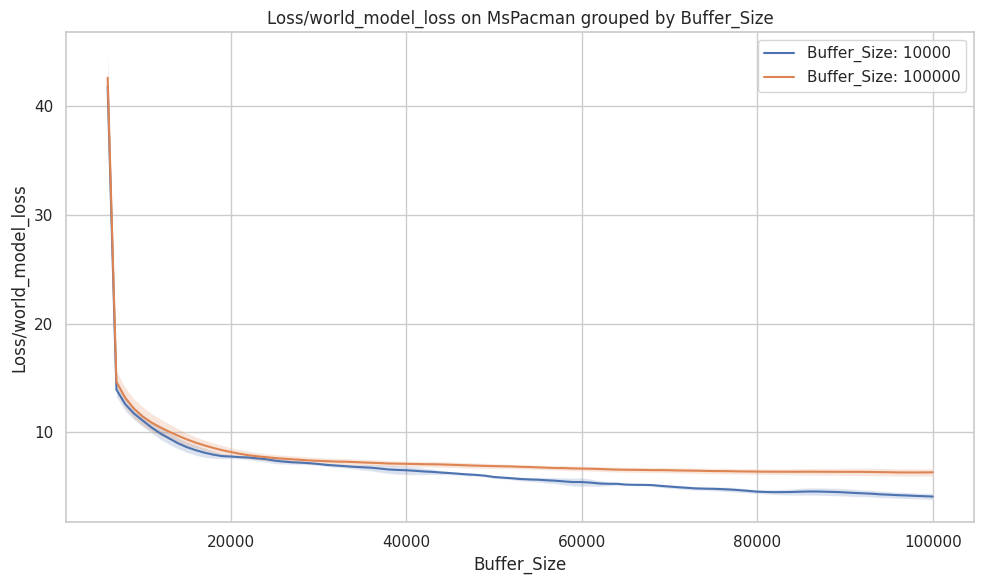

Plotting for metric: Loss/value_loss


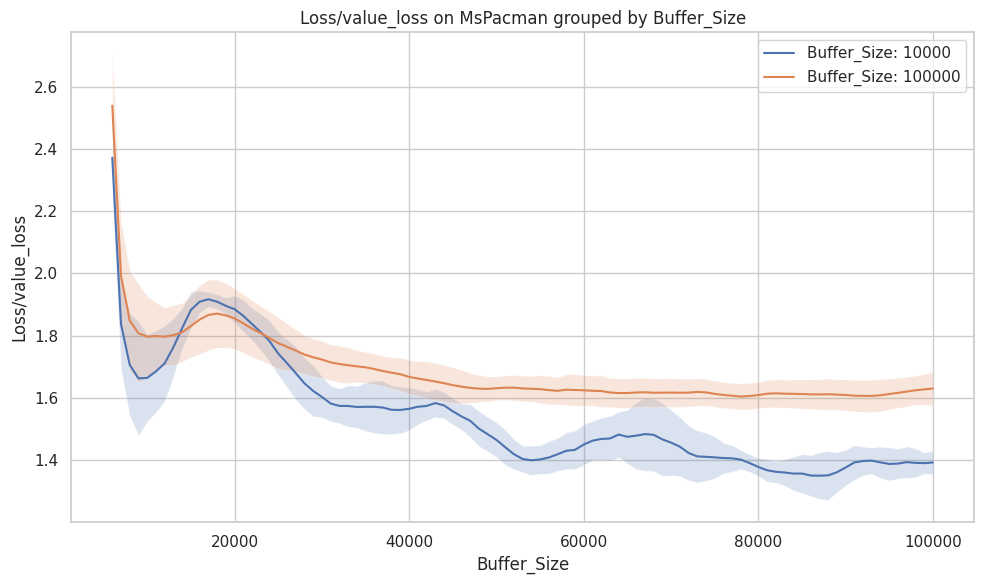

Plotting for metric: Loss/policy_loss


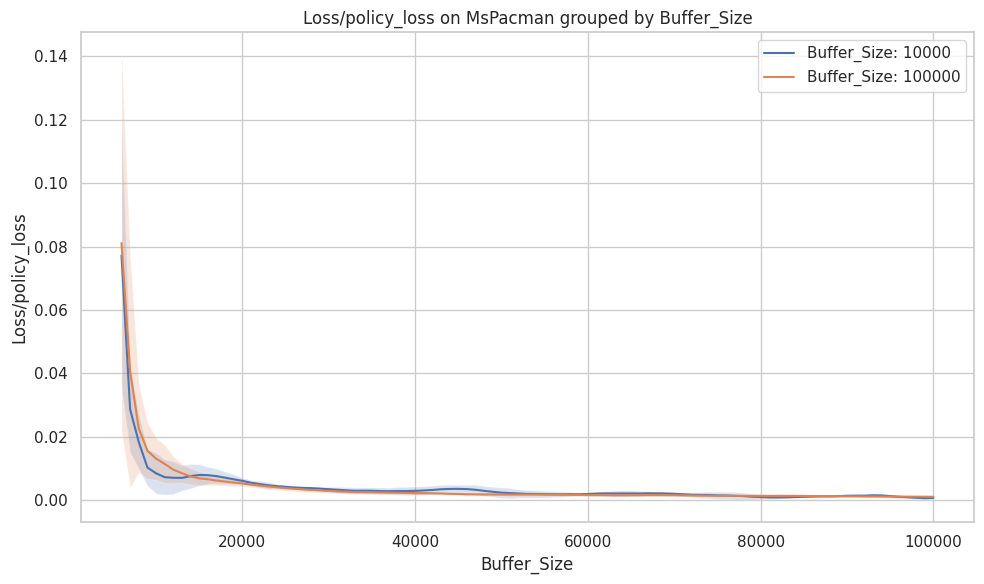

Plotting for metric: Loss/observation_loss


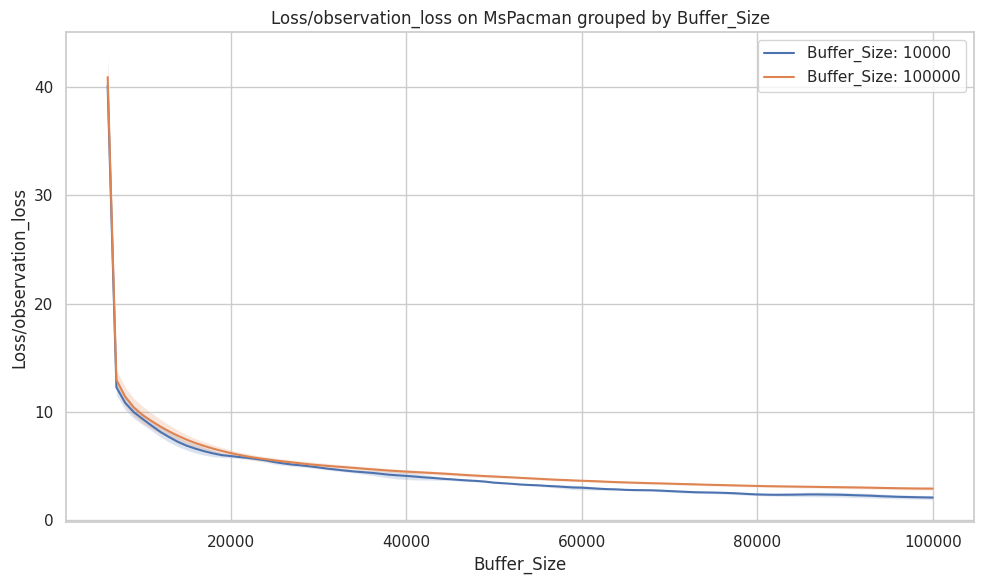

Plotting for metric: Loss/reward_loss


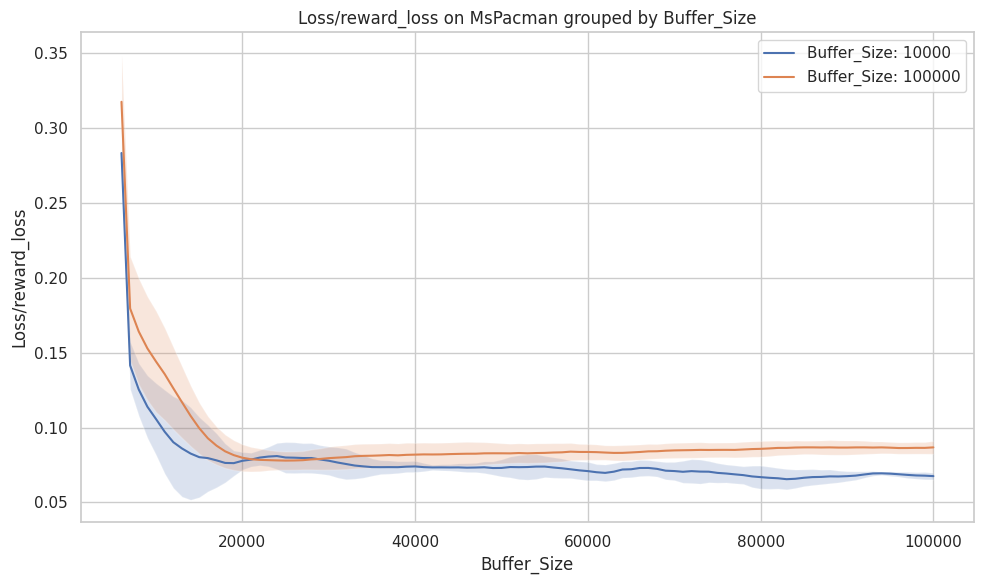

Plotting for metric: Loss/state_loss


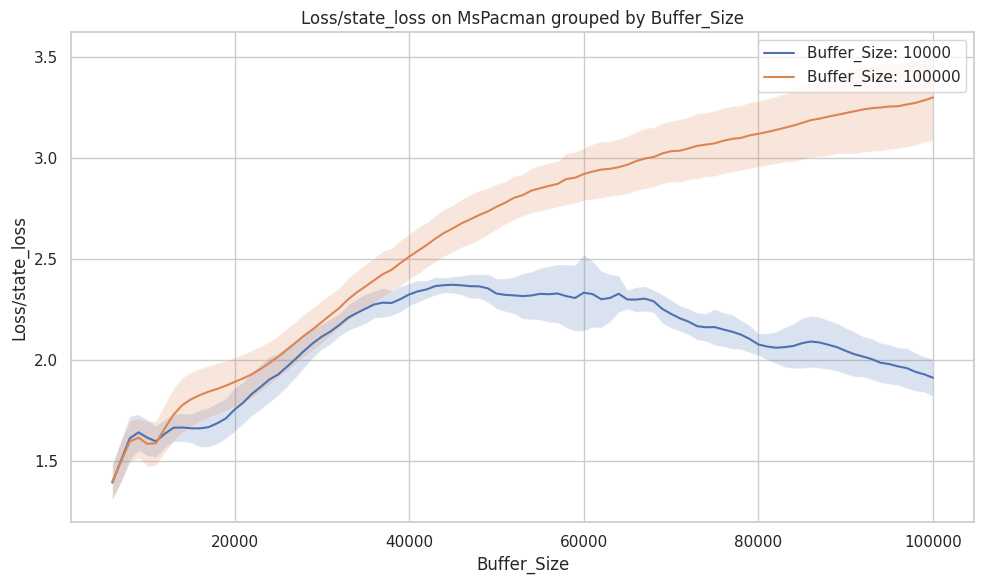

Plotting for metric: Loss/continue_loss


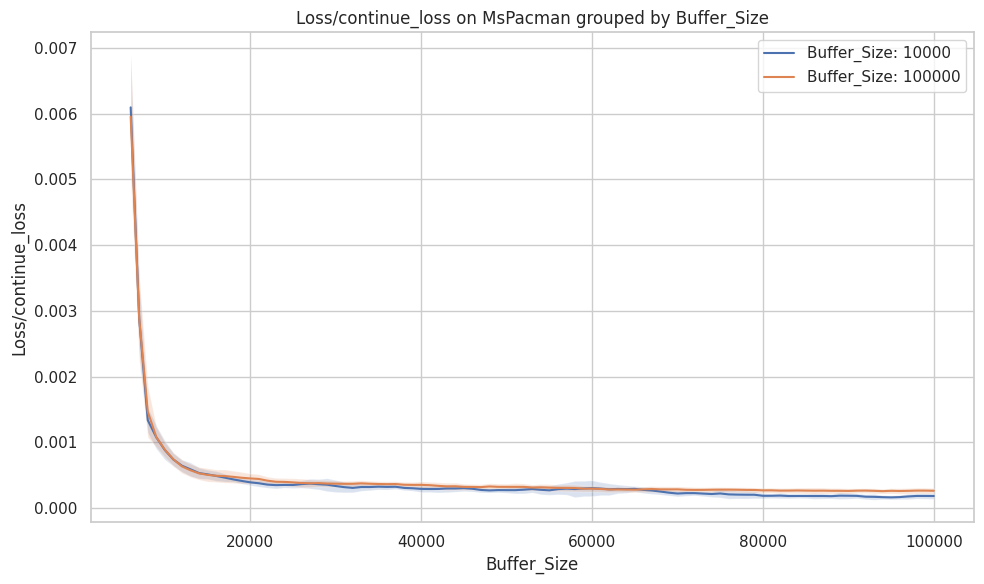

Plotting for metric: State/kl


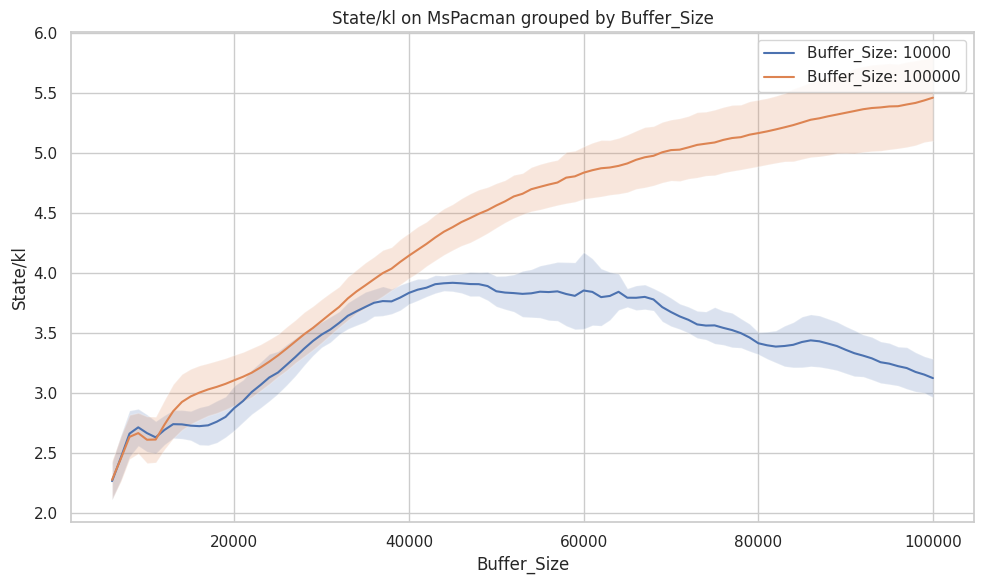

Plotting for metric: State/post_entropy


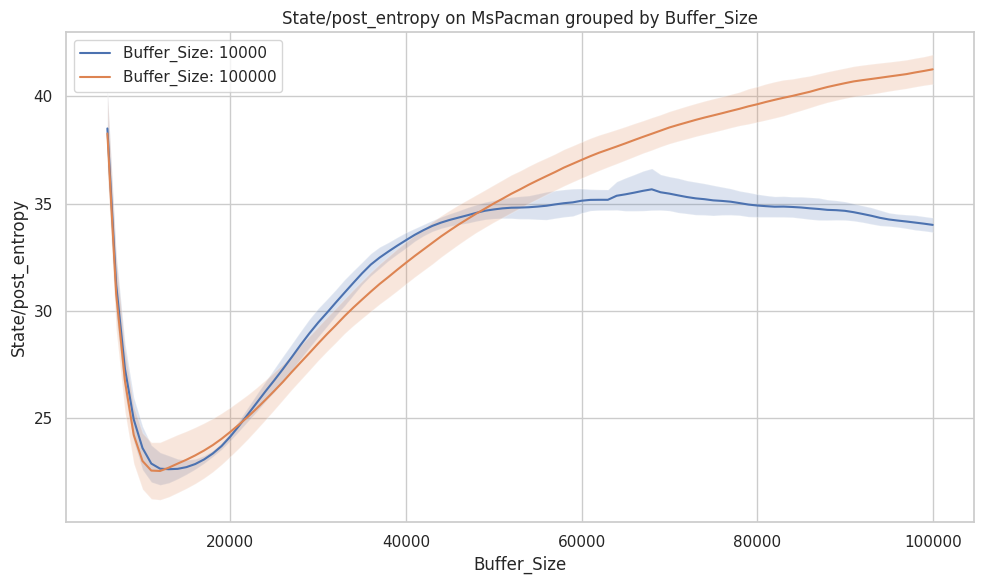

Plotting for metric: State/prior_entropy


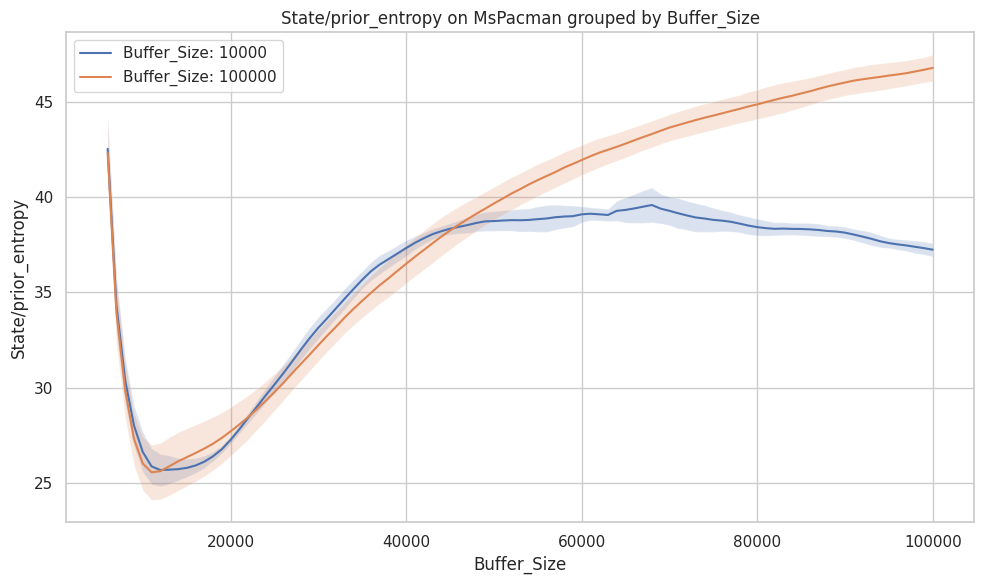

Plotting for metric: Grads/world_model


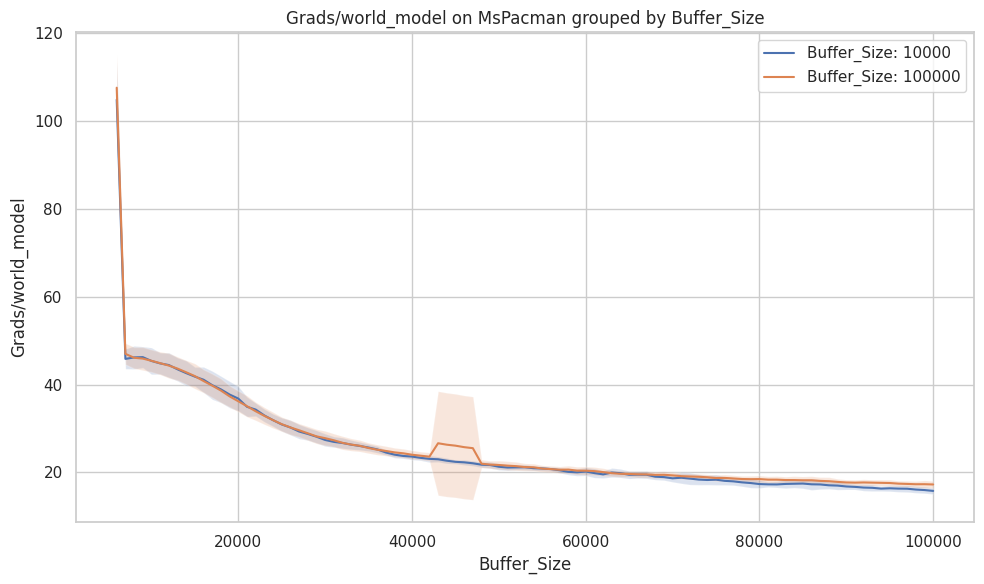

Plotting for metric: Grads/actor


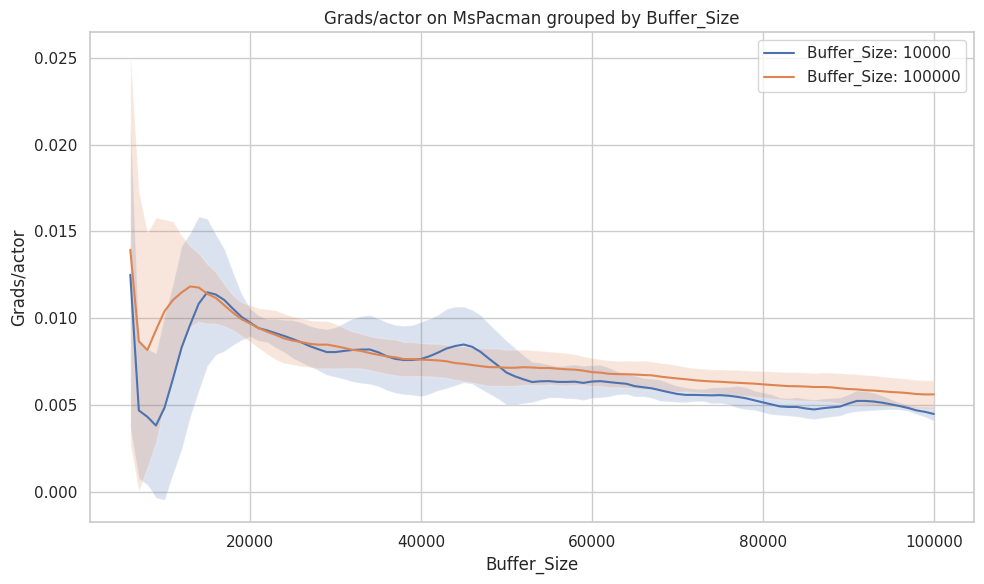

Plotting for metric: Grads/critic


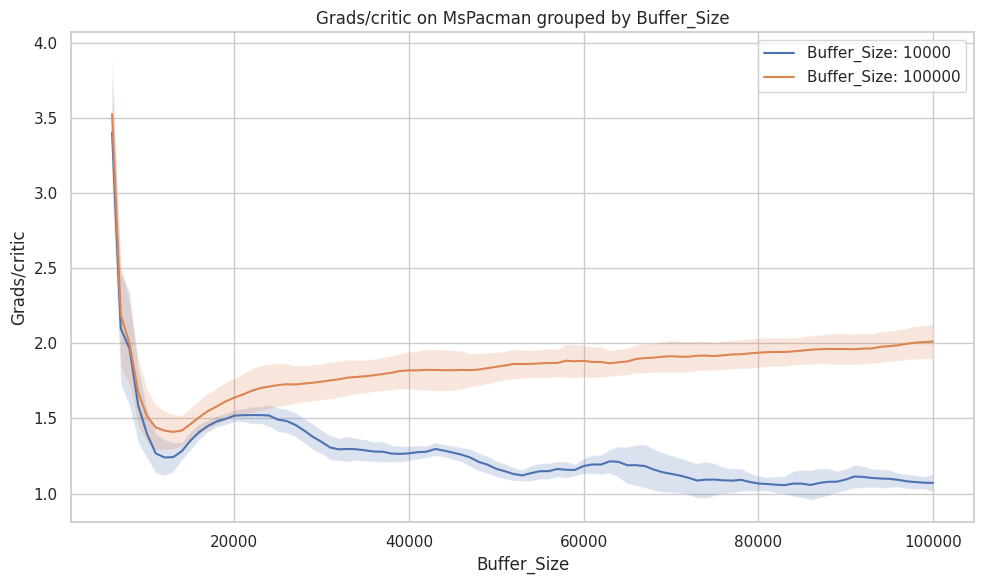

Plotting for metric: Loss/observation_loss_rgb


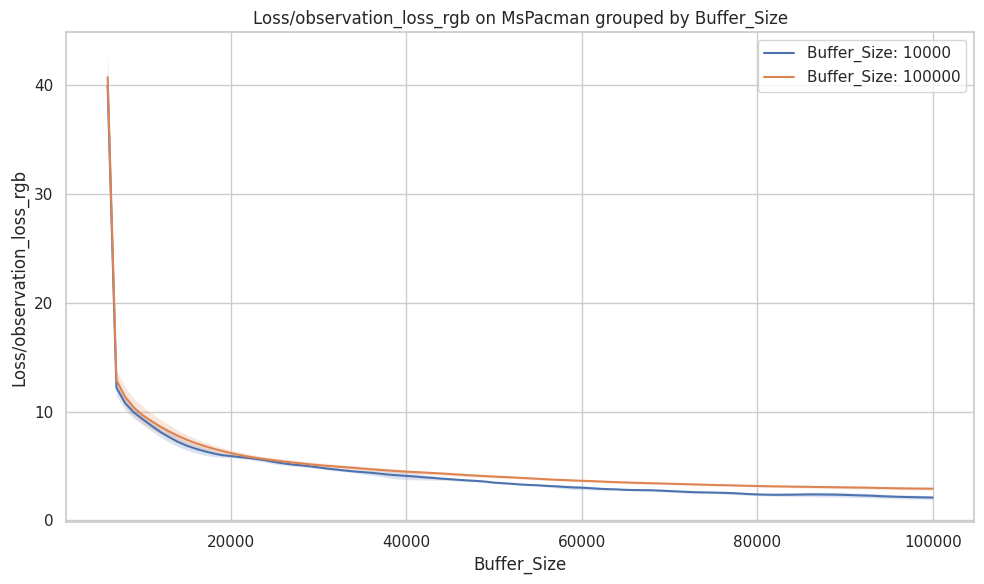

Plotting for metric: Loss/observation_loss_objects_position


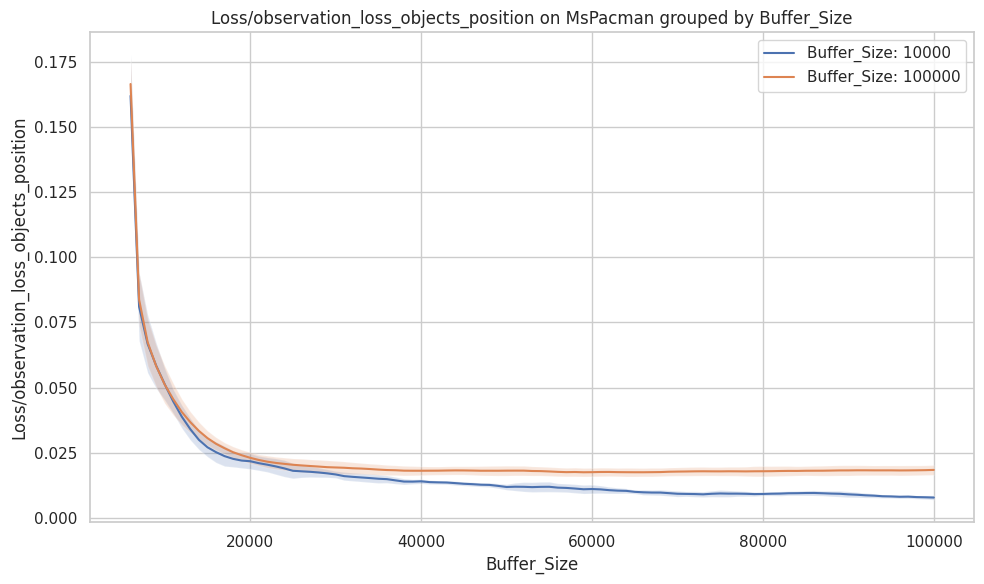

Plotting for metric: Time/sps_train


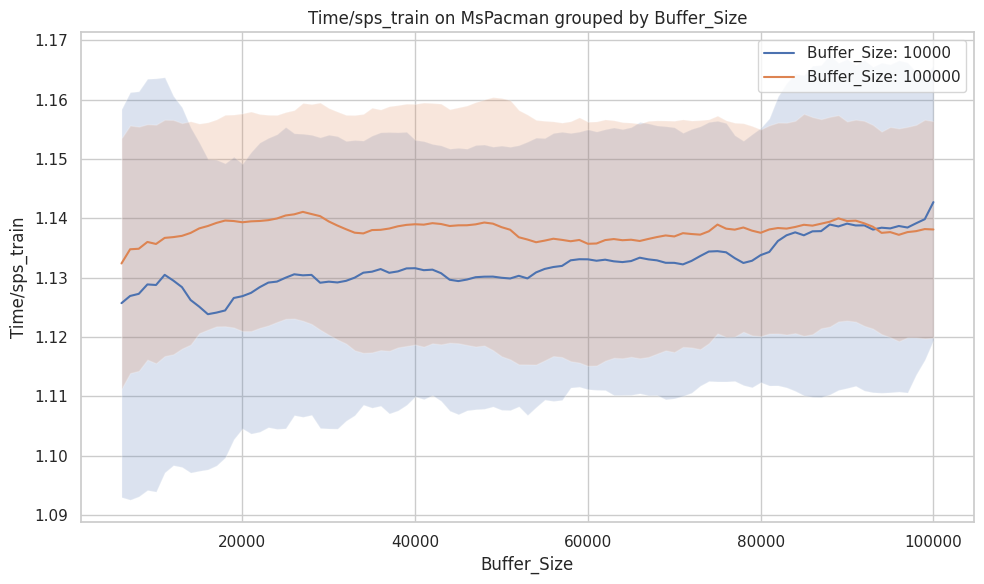

/tmp/ipykernel_4091329/3024990332.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter_name, y="Value", data=metric_df.sort_values(parameter_name), errorbar="sd", palette="muted")
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/local/home/keblin/miniconda3/envs/sheep/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

Plotting for metric: Test/cumulative_reward
Buffer_Size
10000      3
100000    11
Name: Run_ID, dtype: int64


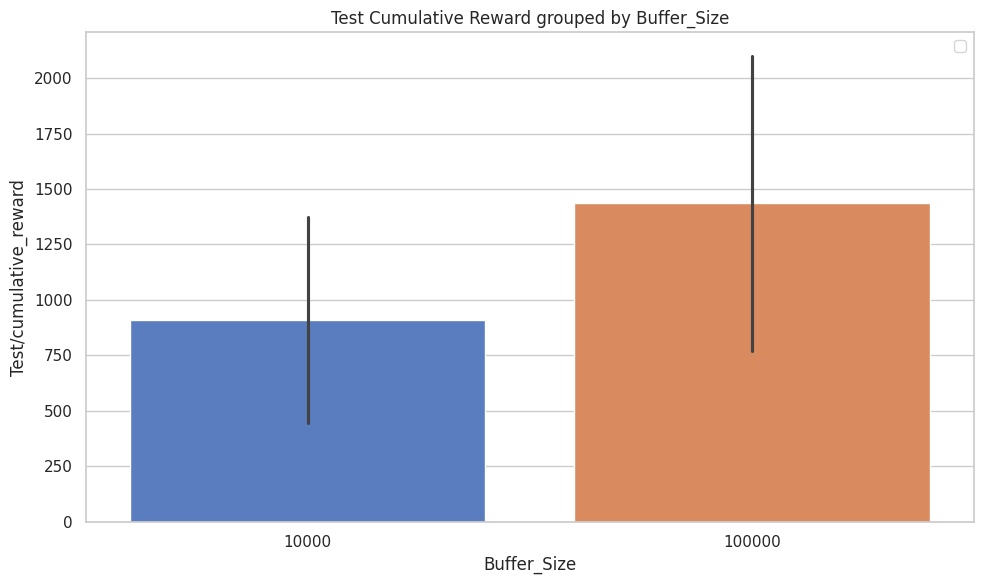

Plotting for metric: Train/cumulative_reward


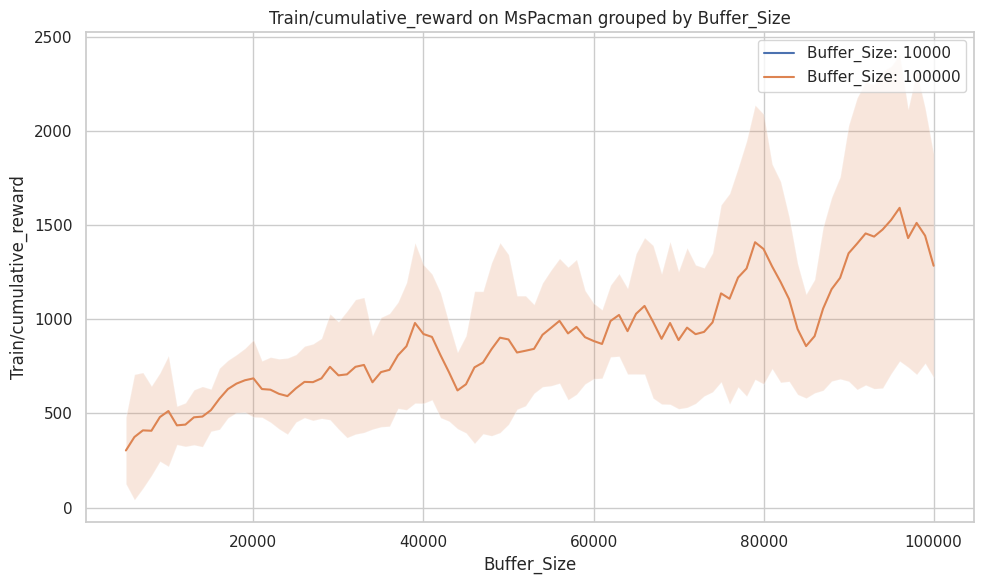

In [23]:
analyze_and_plot_by_parameter('MsPacman', 'Buffer_Size')